<a href="https://colab.research.google.com/github/gseetha04/stakeholder-classification/blob/main/stakeholder_taxonomy_retrain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget -O training_data_companydata.csv https://www.dropbox.com/s/4sx75202bnfpmw0/training_data_companydata.csv?dl=0

--2023-09-06 01:47:26--  https://www.dropbox.com/s/4sx75202bnfpmw0/training_data_companydata.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/4sx75202bnfpmw0/training_data_companydata.csv [following]
--2023-09-06 01:47:27--  https://www.dropbox.com/s/raw/4sx75202bnfpmw0/training_data_companydata.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucdff9b13b51f3db40e66be8698d.dl.dropboxusercontent.com/cd/0/inline/CDLQK-AFfSiyhzNYduie5voBa79WxMaEh_vy4bPhQSbMMPir1wboL_m7gc-Soti-DXLLsEPlCETL0hJqSqz2HBBhFJXjS_u23iHWPCPYIw8Z-MiAFDgL2Nr2-3nODQnfR57fgs7WEuJ_gSK4iA-8JNzA/file# [following]
--2023-09-06 01:47:27--  https://ucdff9b13b51f3db40e66be8698d.dl.dropboxusercontent.com/cd/0/inline/CDLQK-AFfSiyhzNYduie5voBa79WxMaEh_vy4bPhQSbMMP

In [ ]:
from pandas import read_csv
import pandas as pd
import numpy as np

In [ ]:
#training_data = pd.read_csv('training_data_companydata.csv')

In [ ]:
training_data

,Unnamed: 0.1,Unnamed: 0,Column1,Causal-relation ID,Causal-relation text,Variables,Role in the text,expertA_level0,expertA_level1,expertB_level2,expertB_level0,expertB_level1,expertB_level2.1,Label,performance,Label1,Level1,Label2,Level2
0,0,0,0,AFLAC_Wyatt_1,When a policyholder or insured gets sick or ...,cash benefits fairly and promptly for eligible...,outcome,P,CUS,CUS4,P,CUS,CUS4,P,1,CUS,0,CUS4,3
1,1,1,1,AFLAC_Wyatt_1,When a policyholder or insured gets sick or ...,policyholder or insured gets sick or hurt,cause,NP,NP,NP,NP,NP,NP,NP,0,NP,3,NP,11
2,2,2,3,AFLAC_Wyatt_2,"During 2020, in response to the onset and de...",to digital sales methods,outcome,NP,NP,NP,NP,NP,NP,NP,0,NP,3,NP,11
3,3,3,4,AFLAC_Wyatt_2,"During 2020, in response to the onset and de...",related digital investments,outcome,NP,NP,NP,NP,NP,NP,NP,0,NP,3,NP,11
4,4,4,5,AFLAC_Wyatt_2,"During 2020, in response to the onset and de...",the onset and development of the global COVID...,cause,NP,NP,NP,NP,NP,NP,NP,0,NP,3,NP,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14503,14503,14503,21155,ZION_Golnaz_Alice_151,We reduced share-based compensation expense by...,using a valuation model to estimate a liquidit...,cause,NP,NP,NP,NP,NP,NP,NP,0,NP,3,NP,11
14504,14504,14504,21157,ZION_Golnaz_Alice_151,During 2018 after filing its 2017 federal and ...,Bank finalized its analysis of all net DTAs th...,outcome,P,UC,UC,P,UC,UC,P,1,UC,5,UC,15
14505,14505,14505,21158,ZION_Golnaz_Alice_151,During 2018 after filing its 2017 federal and ...,the Act.,cause,NP,NP,NP,NP,NP,NP,NP,0,NP,3,NP,11
14506,14506,14506,21160,ZION_Golnaz_Alice_151,The following schedule does not present total ...,"presents average loans, average deposits and i...",outcome,P,INV,INV1,P,INV,INV1,P,1,INV,2,INV1,7


In [ ]:
kw_cus = ['customer', 'client', 'consumer', 'user', 'policyholder', 'beneficiar','customers']

kw_inv = ['investor', 'financ', 'shareholder', 'stockholder', 'owners', 'investment', 'credit rating', 'return on', 'interest rate', 'net income', 'profit', 'sales', 'revenue', 'earnings']

kw_emp = ['employee', 'worker', 'staff', 'manager']

kw_soc = ['society', 'societal', 'social responsib', 'social performance', 'communit', 'energy environment', 'natural environment', 'ecolog', 'water', 'waste', ' pollu', 'emission', ' gas']



stopwords = ['community college', 'financial institution', 'financial statement', 'financial reporting', 'financial markets', 'financial measures', 'financial services',  'financing activit', 'financial information', 'financial compan', 'financial firm', 'financial entiti', 'financial regulat', 'financing', 'investment compan', 'investment firm', 'investment partner', 'investment industr', 'investment regulat', 'investment law', 'investment activit', 'investigat', ' Financ', ' Invest']

In [ ]:
for p, kw in zip(['CUS', 'INV', 'EMP', 'SOC'], [kw_cus, kw_inv, kw_emp, kw_soc]):
  for word in kw:
    training_data.loc[training_data['Variables'].str.contains(word), 'Label'] = 'P'
    training_data.loc[training_data['Variables'].str.contains(word), 'Label1'] = p

  # for stopword in stopwords:
  #   training_data.loc[training_data['Variables'].str.contains(stopword), 'Label'] = 'NP'
  #   training_data.loc[training_data['Variables'].str.contains(stopword), 'Label1'] = 'NP'

In [ ]:
training_data = pd.read_csv('/content/training_data.csv')

In [ ]:
#for p, kw in zip(['CUS', 'INV', 'EMP', 'SOC'], [kw_cus, kw_inv, kw_emp, kw_soc]):
for stopword in stopwords:
  training_data.loc[training_data['Variables'].str.contains(stopword), 'Label'] = 'NP'
  training_data.loc[training_data['Variables'].str.contains(stopword), 'Label1'] = 'NP'

In [ ]:
# training_data.loc[training_data['Variables'].str.contains('customers'), 'Label'] = 'P'
# training_data.loc[training_data['Variables'].str.contains(word), 'Label1'] = 'CUS'


In [ ]:
training_data.to_csv('/content/training_data.csv')

In [ ]:
training_data

,Unnamed: 0.1,Unnamed: 0,Column1,Causal-relation ID,Causal-relation text,Variables,Role in the text,expertA_level0,expertA_level1,expertB_level2,expertB_level0,expertB_level1,expertB_level2.1,Label,performance,Label1,Level1,Label2,Level2
0,0,0,0,AFLAC_Wyatt_1,When a policyholder or insured gets sick or ...,cash benefits fairly and promptly for eligible...,outcome,P,CUS,CUS4,P,CUS,CUS4,P,1,CUS,0,CUS4,3
1,1,1,1,AFLAC_Wyatt_1,When a policyholder or insured gets sick or ...,policyholder or insured gets sick or hurt,cause,NP,NP,NP,NP,NP,NP,NP,0,NP,3,NP,11
2,2,2,3,AFLAC_Wyatt_2,"During 2020, in response to the onset and de...",to digital sales methods,outcome,NP,NP,NP,NP,NP,NP,NP,0,NP,3,NP,11
3,3,3,4,AFLAC_Wyatt_2,"During 2020, in response to the onset and de...",related digital investments,outcome,NP,NP,NP,NP,NP,NP,NP,0,NP,3,NP,11
4,4,4,5,AFLAC_Wyatt_2,"During 2020, in response to the onset and de...",the onset and development of the global COVID...,cause,NP,NP,NP,NP,NP,NP,NP,0,NP,3,NP,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14503,14503,14503,21155,ZION_Golnaz_Alice_151,We reduced share-based compensation expense by...,using a valuation model to estimate a liquidit...,cause,NP,NP,NP,NP,NP,NP,NP,0,NP,3,NP,11
14504,14504,14504,21157,ZION_Golnaz_Alice_151,During 2018 after filing its 2017 federal and ...,Bank finalized its analysis of all net DTAs th...,outcome,P,UC,UC,P,UC,UC,P,1,UC,5,UC,15
14505,14505,14505,21158,ZION_Golnaz_Alice_151,During 2018 after filing its 2017 federal and ...,the Act.,cause,NP,NP,NP,NP,NP,NP,NP,0,NP,3,NP,11
14506,14506,14506,21160,ZION_Golnaz_Alice_151,The following schedule does not present total ...,"presents average loans, average deposits and i...",outcome,P,INV,INV1,P,INV,INV1,P,1,INV,2,INV1,7


In [ ]:
training_data.to_csv('/content/training_data.csv')

In [ ]:
training_data.iloc[23]

Unnamed: 0                                                             23
Causal-relation ID                                          AFLAC_Wyatt_6
Causal-relation text    As a result of the COVID-19 pandemic, the Comp...
Variables               customers experiencing difficulty paying premiums
Role in the text                                                  outcome
expertA_level0                                                         NP
expertA_level1                                                         NP
expertB_level2                                                         NP
expertB_level0                                                         NP
expertB_level1                                                         NP
expertB_level2.1                                                       NP
Label                                                                   P
Label1                                                                CUS
Label2                                

In [ ]:
from sklearn.linear_model import LogisticRegression
import sklearn.model_selection
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion

In [ ]:
from pandas import read_csv
import pandas as pd
import math
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import torch

In [ ]:
# Method to get level_1 labels from level_2 labels
max_length=0
def label_types (row):
  global max_length
  length = len(row['Label'])
  max_length = max(max_length,length)
  if length == 4 :
    return row['Label'][0:3]
  else: return row['Label']

In [ ]:
training_data = read_csv('training_data.csv')
# training_data['Label'] = pd.Categorical(training_data['Label'])
# training_data['Label_num_level_2'] = training_data['Label'].cat.codes
# training_data['Label_num_level_2'].astype('int64')
# training_data['Label_level_1'] = training_data.apply (lambda row: label_types(row), axis=1)
# training_data['Label_level_1'] = pd.Categorical(training_data['Label_level_1'])
# training_data['Label_num_level_1'] = training_data['Label_level_1'].cat.codes
# training_data['Label_num_level_1'].astype('int64')
# training_data.head(20)

training_data['Label_f'] = pd.Categorical(training_data['Label'])
training_data['performance'] = training_data['Label_f'].cat.codes

training_data['Label1_f'] = pd.Categorical(training_data['Label1'])
training_data['Level1'] = training_data['Label1_f'].cat.codes

training_data['Label2_f'] = pd.Categorical(training_data['Label2'])
training_data['Level2'] = training_data['Label2_f'].cat.codes

training_data.head(20)

,Unnamed: 0,Causal-relation ID,Causal-relation text,Variables,Role in the text,expertA_level0,expertA_level1,expertB_level2,expertB_level0,expertB_level1,expertB_level2.1,Label,Label1,Label2,Label_f,performance,Label1_f,Level1,Label2_f,Level2
0,0,AFLAC_Wyatt_1,When a policyholder or insured gets sick or ...,cash benefits fairly and promptly for eligible...,outcome,P,CUS,CUS4,P,CUS,CUS4,P,CUS,CUS4,P,1,CUS,0,CUS4,3
1,1,AFLAC_Wyatt_1,When a policyholder or insured gets sick or ...,policyholder or insured gets sick or hurt,cause,NP,NP,NP,NP,NP,NP,P,CUS,NP,P,1,CUS,0,NP,11
2,2,AFLAC_Wyatt_2,"During 2020, in response to the onset and dev...",to digital sales methods,outcome,NP,NP,NP,NP,NP,NP,P,INV,NP,P,1,INV,2,NP,11
3,3,AFLAC_Wyatt_2,"During 2020, in response to the onset and dev...",related digital investments,outcome,NP,NP,NP,NP,NP,NP,P,INV,NP,P,1,INV,2,NP,11
4,4,AFLAC_Wyatt_2,"During 2020, in response to the onset and dev...",the onset and development of the global COVID-...,cause,NP,NP,NP,NP,NP,NP,NP,NP,NP,NP,0,NP,3,NP,11
5,5,AFLAC_Wyatt_3,Prolonged periods of low interest rates als...,the risk,outcome,NP,NP,NP,NP,NP,NP,NP,NP,NP,NP,0,NP,3,NP,11
6,6,AFLAC_Wyatt_3,Prolonged periods of low interest rates als...,lower rates of return,outcome,NP,NP,NP,NP,NP,NP,NP,NP,NP,NP,0,NP,3,NP,11
7,7,AFLAC_Wyatt_3,Prolonged periods of low interest rates als...,book yield of the investment portfolio.,outcome,NP,NP,NP,NP,NP,NP,P,INV,NP,P,1,INV,2,NP,11
8,8,AFLAC_Wyatt_3,Prolonged periods of low interest rates als...,Prolonged periods of low interest rates,cause,NP,NP,NP,NP,NP,NP,P,INV,NP,P,1,INV,2,NP,11
9,9,AFLAC_Wyatt_4,"Conversely, a rise in interest rates could ...",higher rates of return on future investments,outcome,P,INV,INV2,P,INV,INV2,P,INV,INV2,P,1,INV,2,INV2,8


In [ ]:
training_data.iloc[23]

Unnamed: 0                                                             23
Causal-relation ID                                          AFLAC_Wyatt_6
Causal-relation text    As a result of the COVID-19 pandemic, the Comp...
Variables               customers experiencing difficulty paying premiums
Role in the text                                                  outcome
expertA_level0                                                         NP
expertA_level1                                                         NP
expertB_level2                                                         NP
expertB_level0                                                         NP
expertB_level1                                                         NP
expertB_level2.1                                                       NP
Label                                                                   P
Label1                                                                CUS
Label2                                

In [ ]:
training_data = training_data.iloc[:,5:25]

In [ ]:
training_data

,Column1,Causal-relation ID,Causal-relation text,Variables,Role in the text,expertA_level0,expertA_level1,expertB_level2,expertB_level0,expertB_level1,expertB_level2.1,Label,performance,Label1,Level1,Label2,Level2
0,0,AFLAC_Wyatt_1,When a policyholder or insured gets sick or ...,cash benefits fairly and promptly for eligible...,outcome,P,CUS,CUS4,P,CUS,CUS4,P,1,CUS,0,CUS4,3
1,1,AFLAC_Wyatt_1,When a policyholder or insured gets sick or ...,policyholder or insured gets sick or hurt,cause,NP,NP,NP,NP,NP,NP,NP,0,NP,3,NP,11
2,3,AFLAC_Wyatt_2,"During 2020, in response to the onset and de...",to digital sales methods,outcome,NP,NP,NP,NP,NP,NP,NP,0,NP,3,NP,11
3,4,AFLAC_Wyatt_2,"During 2020, in response to the onset and de...",related digital investments,outcome,NP,NP,NP,NP,NP,NP,NP,0,NP,3,NP,11
4,5,AFLAC_Wyatt_2,"During 2020, in response to the onset and de...",the onset and development of the global COVID...,cause,NP,NP,NP,NP,NP,NP,NP,0,NP,3,NP,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14503,21155,ZION_Golnaz_Alice_151,We reduced share-based compensation expense by...,using a valuation model to estimate a liquidit...,cause,NP,NP,NP,NP,NP,NP,NP,0,NP,3,NP,11
14504,21157,ZION_Golnaz_Alice_151,During 2018 after filing its 2017 federal and ...,Bank finalized its analysis of all net DTAs th...,outcome,P,UC,UC,P,UC,UC,P,1,UC,5,UC,15
14505,21158,ZION_Golnaz_Alice_151,During 2018 after filing its 2017 federal and ...,the Act.,cause,NP,NP,NP,NP,NP,NP,NP,0,NP,3,NP,11
14506,21160,ZION_Golnaz_Alice_151,The following schedule does not present total ...,"presents average loans, average deposits and i...",outcome,P,INV,INV1,P,INV,INV1,P,1,INV,2,INV1,7


In [ ]:
training_data.to_csv('/content/training_data.csv')

In [ ]:
k=5
seed = 1
kf = StratifiedKFold(n_splits=k,random_state=seed, shuffle=True)
label_count = {'performance':2,'Level1':5,'Level2':16}
for label, count in label_count.items():
  x=training_data
  y=training_data[label]
  metrics=[]
  i=1
  for train_index, val_index in kf.split(x,y):
    train_texts, val_texts =x['Variables'].iloc[train_index],x['Variables'].iloc[val_index]
    train_labels, val_labels =y.iloc[train_index],y.iloc[val_index]
    list_text = []
    for words in train_texts:
      list_text.append(words)

    # Preprocessing data to feed into MultinomialNB Classifier
    # Tried ngram_range=[1,1],[2,2],[3,3]
    count_vect = CountVectorizer(ngram_range=(1,3))
    tfidf_transformer=TfidfTransformer()

    # Pipeline using CountVectorizer and TfidfTransformer
    pipeline = Pipeline([('count_vect',count_vect),('tfidf_transformer',tfidf_transformer)])
    pipeline_output = pipeline.fit_transform(list_text)
    param_grid_ = {'C': [1e-5, 1e-3, 1e-1, 1e0, 1e1, 1e2]}
    clf = GridSearchCV(LogisticRegression(solver='lbfgs', max_iter=1000, class_weight='balanced'), cv=5, param_grid=param_grid_).fit(pipeline_output, train_labels)
    # Evaluation Model performance on the Test data
    sentence_list = val_texts.to_list()
    pipeline_test = Pipeline([('count_vect',count_vect),('tfidf_transformer',tfidf_transformer)])
    pipeline_test_output = pipeline_test.transform(sentence_list)
    predicted = clf.predict(pipeline_test_output)

    # #Predicting Causal variables into Performance and Non Performance groups
    # variables_list = merged_causal_statements['Variables'].to_list()
    # pipeline_causal=pipeline_test.transform(variables_list)
    # predicted_causal = clf.predict(pipeline_causal)
    # classification_prediction_causal_list =[]
    # for variable, classification in zip(variables_list, predicted_causal):
    #   classification_prediction_causal_list.append(classification)

    classification_prediction_list =[]
    for sentence, classification in zip(sentence_list, predicted):
      classification_prediction_list.append(classification)
    # Naive_Bayes Model metrics
    classification_list = val_labels.to_list()
    indices = val_index
    training_data.loc[indices, "Logistic_{}_Predictions".format(label)]=classification_prediction_list
    # # merged_causal_statements["Logistic_{}_Predictions_{}".format(label,i)]=classification_prediction_causal_list
    #i = i+1

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

In [ ]:
training_data

,Unnamed: 0.1,Unnamed: 0,Causal-relation ID,Causal-relation text,Variables,Role in the text,expertA_level0,expertA_level1,expertB_level2,expertB_level0,...,Label2,Label_f,performance,Label1_f,Level1,Label2_f,Level2,Logistic_performance_Predictions,Logistic_Level1_Predictions,Logistic_Level2_Predictions
0,0,0,AFLAC_Wyatt_1,When a policyholder or insured gets sick or ...,cash benefits fairly and promptly for eligible...,outcome,P,CUS,CUS4,P,...,CUS4,P,1,CUS,0,CUS4,3,1.0,1.0,5.0
1,1,1,AFLAC_Wyatt_1,When a policyholder or insured gets sick or ...,policyholder or insured gets sick or hurt,cause,NP,NP,NP,NP,...,NP,P,1,CUS,0,NP,11,1.0,0.0,11.0
2,2,2,AFLAC_Wyatt_2,"During 2020, in response to the onset and dev...",to digital sales methods,outcome,NP,NP,NP,NP,...,NP,P,1,INV,2,NP,11,1.0,2.0,11.0
3,3,3,AFLAC_Wyatt_2,"During 2020, in response to the onset and dev...",related digital investments,outcome,NP,NP,NP,NP,...,NP,P,1,INV,2,NP,11,1.0,2.0,11.0
4,4,4,AFLAC_Wyatt_2,"During 2020, in response to the onset and dev...",the onset and development of the global COVID-...,cause,NP,NP,NP,NP,...,NP,NP,0,NP,3,NP,11,0.0,3.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14503,14503,14503,ZION_Golnaz_Alice_151,We reduced share-based compensation expense by...,using a valuation model to estimate a liquidit...,cause,NP,NP,NP,NP,...,NP,NP,0,NP,3,NP,11,0.0,3.0,11.0
14504,14504,14504,ZION_Golnaz_Alice_151,During 2018 after filing its 2017 federal and ...,Bank finalized its analysis of all net DTAs th...,outcome,P,UC,UC,P,...,UC,P,1,UC,5,UC,15,1.0,2.0,7.0
14505,14505,14505,ZION_Golnaz_Alice_151,During 2018 after filing its 2017 federal and ...,the Act.,cause,NP,NP,NP,NP,...,NP,NP,0,NP,3,NP,11,0.0,3.0,11.0
14506,14506,14506,ZION_Golnaz_Alice_151,The following schedule does not present total ...,"presents average loans, average deposits and i...",outcome,P,INV,INV1,P,...,INV1,P,1,INV,2,INV1,7,1.0,2.0,7.0


In [ ]:
print("Logistic")
print("PERFORMANCE")
print(classification_report(training_data['performance'], training_data['Logistic_performance_Predictions'], zero_division = 1))
print("Label_num_level_1")
print(classification_report(training_data['Level1'], training_data['Logistic_Level1_Predictions'], zero_division = 1))
print("Label_num_level_2")
print(classification_report(training_data['Level2'], training_data['Logistic_Level2_Predictions'], zero_division = 1))

Logistic
PERFORMANCE
              precision    recall  f1-score   support

           0       0.94      0.91      0.92     10485
           1       0.78      0.85      0.81      4023

    accuracy                           0.89     14508
   macro avg       0.86      0.88      0.87     14508
weighted avg       0.89      0.89      0.89     14508

Label_num_level_1
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       491
           1       0.72      0.62      0.67       303
           2       0.80      0.87      0.83      2647
           3       0.94      0.92      0.93     10485
           4       0.71      0.31      0.43        39
           5       0.35      0.32      0.33       543

    accuracy                           0.88     14508
   macro avg       0.73      0.66      0.68     14508
weighted avg       0.88      0.88      0.88     14508

Label_num_level_2
              precision    recall  f1-score   support

           0      

In [ ]:
####################rule-based Level0######################################################

In [ ]:

import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
import numpy as np
import random

In [ ]:
df = pd.read_csv('training_data.csv')
df = df.groupby('Variables').max().reset_index()

print('10 random samples:')
display(df.sample(10))

print('labels:')
print(df['performance'].value_counts())

10 random samples:


,Variables,Unnamed: 0.1,Unnamed: 0,Causal-relation ID,Causal-relation text,Role in the text,expertA_level0,expertA_level1,expertB_level2,expertB_level0,...,expertB_level2.1,Label,Label1,Label2,Label_f,performance,Label1_f,Level1,Label2_f,Level2
5291,become undercapitalized.,8761,8761,NTRS_Golnaz_Alice_152,"The Bank may not pay any dividends if it is undercapitalized, or if the payment of the dividend would cause it to become undercapitalized.",outcome,NP,NP,NP,NP,...,NP,NP,NP,NP,NP,0,NP,3,NP,11
1901,Corporation assumes various types of risk,2505,2505,CMA_Jordan_40,The Corporation assumes various types of risk as a result of conducting business in the normal course,outcome,NP,NP,NP,NP,...,NP,NP,NP,NP,NP,0,NP,3,NP,11
9321,nation state cyber attacks and ransomware are both increasing in sophistication and prevalence,3514,3514,HBAN_Jordan_12,"Due to increasing geopolitical tensions, nation state cyber attacks and ransomware are both increasing in sophistication and prevalence",outcome,NP,NP,NP,NP,...,NP,NP,NP,NP,NP,0,NP,3,NP,11
4574,ability to meet contractual obligations to be similarly affected by changes in economic or other conditions.,9038,9038,NTRS_Golnaz_Alice_152,Concentrations of credit risk exist if a number of borrowers or other counterparties are engaged in similar activities and have similar economic characteristics that would cause their ability to meet contractual obligations to be similarly affected by changes in economic or other conditions.,outcome,NP,NP,NP,NP,...,NP,NP,NP,NP,NP,0,NP,3,NP,11
7126,facilitate client activities,3461,3461,GS_Jordan_56,"We enter into securities financing transactions in order to, among other things, facilitate client activities, invest excess cash, acquire securities to cover short positions and finance certain activities",outcome,NP,NP,NP,NP,...,NP,P,CUS,NP,P,1,CUS,0,NP,11
11665,the Firm's securitization activities.,8021,8021,MS_Golnaz_Alice_188,"Additionally, the Firm holds certain commercial mortgage-backed securities issued by VIEs retained as a result of the Firm's securitization activities.",cause,NP,NP,NP,NP,...,NP,NP,NP,NP,NP,0,NP,3,NP,11
2804,"Net interest income on an FTE basis, inclusive of the FTP methodology enhancements described above, decreased",8932,8932,NTRS_Golnaz_Alice_152,"Net interest income on an FTE basis, inclusive of the FTP methodology enhancements described above, decreased $73.5 million, or 7%, in 2019 to $918.7 million from $992.2 million in 2018, primarily reflecting higher charges due to the FTP methodology enhancements and a decrease in the net interest margin, partially offset by an increase in average earning assets.",outcome,P,INV,INV1,P,...,INV1,P,INV,INV1,P,1,INV,2,INV1,7
953,their interest income relates to the accretable yield recognized at the pool level and not to contractual interest payments at the loan level.,9309,9309,PBCT_Golnaz_Alice_177,"Rather, PCI loans are considered to be accruing loans because their interest income relates to the accretable yield recognized at the pool level and not to contractual interest payments at the loan level.",cause,NP,NP,NP,NP,...,NP,NP,NP,NP,NP,0,NP,3,NP,11
13351,"we must provide reliable, secure, real-time access to our electronic trading platforms for our clients.",7129,7129,MKTX_Golnaz_Alice_113,"In order to be successful, we must provide reliable, secure, real-time access to our electronic trading platforms for our clients.",outcome,NP,NP,NP,NP,...,NP,P,CUS,NP,P,1,CUS,0,NP,11
1126,A client may claim it suffered losses,934,934,AON_Ryan_12,"A client may claim it suffered losses due to reliance on our consulting advice, which poses risks of liability exposure and costs of defense and increased insurance premiums",outcome,P,CUS,CUS1,P,...,CUS1,P,CUS,CUS1,P,1,CUS,0,CUS1,0


labels:
0    9669
1    3820
Name: performance, dtype: int64


In [ ]:
keywords = ['customer', 'client', 'consumer',
            'investor', 'financ', 'shareholder', 'stockholder', 'owners', 'investment', 'return on', 'net income', 'profit', 'revenue', 'earnings',
            'employee', 'worker', 'manager',
            'society', 'societal', 'social responsib', 'social performance', 'communit', 'natural environment']

In [ ]:
df['label_rule_based'] = 0

for keyword in keywords:
  df.loc[df['Variables'].str.contains(keyword), 'label_rule_based'] = 1

In [ ]:
print(df['performance'].mean())
print(df['label_rule_based'].mean())

0.2831937133961005
0.19215657202164727


In [ ]:
y_true = df['performance']
y_pred = df['label_rule_based']

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
specificity = tn / (tn+fp)

print(f'Accuracy: {accuracy_score(y_true, y_pred)}')
print(f'Recall: {recall_score(y_true, y_pred)}')
print(f'Precision: {precision_score(y_true, y_pred)}')
print(f'F1: {f1_score(y_true, y_pred)}')

Accuracy: 0.856772184743124
Recall: 0.5863874345549738
Precision: 0.8641975308641975
F1: 0.6986899563318776


In [ ]:
################################RNN - Level0######################################################

In [ ]:
import numpy as np
import pandas as pd

import tensorflow_datasets as tfds
import tensorflow as tf

tfds.disable_progress_bar()

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

In [ ]:

df = pd.read_csv('training_data.csv')
df = df.groupby('Variables').max().reset_index()

print('10 random samples:')
display(df.sample(10))

print('labels:')
print(df['performance'].value_counts())

10 random samples:


,Variables,Unnamed: 0.1,Unnamed: 0,Causal-relation ID,Causal-relation text,Role in the text,expertA_level0,expertA_level1,expertB_level2,expertB_level0,...,expertB_level2.1,Label,Label1,Label2,Label_f,performance,Label1_f,Level1,Label2_f,Level2
8236,increasing geopolitical tensions,3515,3515,HBAN_Jordan_12,"Due to increasing geopolitical tensions, nation state cyber attacks and ransomware are both increasing in sophistication and prevalence",cause,NP,NP,NP,NP,...,NP,NP,NP,NP,NP,0,NP,3,NP,11
12292,the note issuers have the right to call outstanding amounts ahead of their contractual maturity,10795,10795,SIVB_Golnaz_Alice_221,Expected remaining maturities for certain U.S. agency debentures may occur earlier than their contractual maturities because the note issuers have the right to call outstanding amounts ahead of their contractual maturity.,cause,NP,NP,NP,NP,...,NP,NP,NP,NP,NP,0,NP,3,NP,11
12278,"the net change in the fair value of the liability may be either a decrease or an increase, depending on the relative changes in projected rider fees and projected benefit payments",396,396,AIG_Ryan_73,"Increases in assumed volatility will generally increase the fair value of both the projected cash flows from rider fees as well as the projected cash flows related to benefit payments. therefore, the net change in the fair value of the liability may be either a decrease or an increase, depending on the relative changes in projected rider fees and projected benefit payments",outcome,P,EMP,EMP3,P,...,EMP3,P,EMP,EMP3,P,1,EMP,1,EMP3,5
7920,impair their ability to repay obligations owed to JPMorgan Chase,4006,4006,JPM_Golnaz_Alice_26,"If large numbers of consumers subsequently default on their loans, whether due to weak credit profiles, an economic downturn or other factors, this could impair their ability to repay obligations owed to JPMorgan Chase and result in higher charge-offs and other credit-related losses.",outcome,NP,NP,NP,NP,...,NP,NP,NP,NP,NP,0,NP,3,NP,11
3852,These factors were considered by the Company,9378,9378,PBCT_Golnaz_Alice_177,"These factors were considered by the Company and, as a result, it was concluded that there was sufficient evidence to support that a full loss was probable.",cause,NP,NP,NP,NP,...,NP,NP,NP,NP,NP,0,NP,3,NP,11
3657,The effective tax rate for each of 2018 and 2017 included the recognition of tax benefits of $18.0 million,10758,10758,SIVB_Golnaz_Alice_221,"The effective tax rate for each of 2018 and 2017 included the recognition of tax benefits of $18.0 million due to the adoption of ASU 2016-09, Improvements to Employee Share-Based Payment Accounting.",outcome,P,UC,UC,P,...,UC,P,UC,UC,P,1,UC,5,UC,15
8199,increases in AUM of $10.3 billion,3884,3884,IVZ_Jordan_27,"During the year ended December31, 2020, we experienced increases in AUM of $10.3 billion due to changes in foreign exchange rates (December31, 2019: AUM increased by$2.5 billion)",outcome,P,INV,INV1,P,...,INV1,P,INV,INV1,P,1,INV,2,INV1,7
9830,our allowance for loan and lease losses to increase.,4796,4796,KEY_Golnaz_Alice_23,Various factors may cause our allowance for loan and lease losses to increase.,outcome,NP,NP,NP,NP,...,NP,NP,NP,NP,NP,0,NP,3,NP,11
8205,increases in both the U.S. and non-U.S. plans was primarily,7419,7419,MMC_Golnaz_Alice_132,The increases in both the U.S. and non-U.S. plans was primarily due to a decrease in the discount rate used to measure plan liabilities partly offset by an increase in asset values.,outcome,NP,NP,NP,NP,...,NP,NP,NP,NP,NP,0,NP,3,NP,11
11569,the Company has (i) the power to direct the activities that most significantly impact the economic performance of the VIE,12542,12542,TFC_Golnaz_Alice_213,"The Company concluded that the VIEs should be consolidated because the Company has (i) the power to direct the activities that most significantly impact the economic performance of the VIE and (ii) the obligation to absorb losses, and the right to receive benefits, that could potentially be significant.",cause,N

labels:
0    9669
1    3820
Name: performance, dtype: int64


In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

In [ ]:
!mkdir knowledge_data
!mkdir knowledge_data/neg
!mkdir knowledge_data/pos

In [ ]:
for i in df[df['performance']==0].index:
  txt = df.iloc[i]['Variables']
  text_file = open(f"knowledge_data/neg/{i}.txt", "wt")
  text_file.write(txt)
  text_file.close()
for i in df[df['performance']==1].index:
  txt = df.iloc[i]['Variables']
  text_file = open(f"knowledge_data/pos/{i}.txt", "wt")
  text_file.write(txt)
  text_file.close()

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
batch_size = 32
seed = 42

raw_train_ds = tf.keras.utils.text_dataset_from_directory(
    'knowledge_data',
    batch_size=batch_size,
    validation_split=0.2,
    subset='training',
    seed=seed)

class_names = raw_train_ds.class_names
train_dataset = raw_train_ds.cache().prefetch(buffer_size=AUTOTUNE)

test_dataset = tf.keras.utils.text_dataset_from_directory(
    'knowledge_data',
    batch_size=batch_size,
    validation_split=0.2,
    subset='validation',
    seed=seed)

test_dataset = test_dataset.cache().prefetch(buffer_size=AUTOTUNE)

Found 13489 files belonging to 2 classes.
Using 10792 files for training.
Found 13489 files belonging to 2 classes.
Using 2697 files for validation.


In [ ]:
for example, label in train_dataset.take(1):
  print('texts: ', example.numpy()[:3])
  print()
  print('labels: ', label.numpy()[:3])

texts:  [b'some of our competitors seek to obtain market share'
 b'tangible common shareholders equity is not formally defined by GAAP'
 b'management considers a variety of factors and inputs in estimating the allowance for credit losses.']

labels:  [0 1 0]


In [ ]:

VOCAB_SIZE = 1000
encoder = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(train_dataset.map(lambda text, label: text))

In [ ]:
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'the', 'of', 'and', 'to', 'in', 'or', 'our', 'a',
       'for', 'are', 'on', 'not', 'that', 'is', 'be', 'may', 'from', 'as'],
      dtype='<U15')

In [ ]:
encoded_example = encoder(example)[:3].numpy()
encoded_example

array([[284,   3,   8, 494,   1,   5, 566,  33, 187,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  1, 211, 616,  80,  15,  13,   1, 532,  20, 607,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [ 75,   1,   9, 675,   3,  97,   4, 327,   6,   1,   2, 224,  10,
         36,  43,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0]])

In [ ]:
for n in range(3):
  print("Original: ", example[n].numpy())
  print("Round-trip: ", " ".join(vocab[encoded_example[n]]))
  print()

Original:  b'some of our competitors seek to obtain market share'
Round-trip:  some of our competitors [UNK] to obtain market share                               

Original:  b'tangible common shareholders equity is not formally defined by GAAP'
Round-trip:  [UNK] common shareholders equity is not [UNK] defined by gaap                              

Original:  b'management considers a variety of factors and inputs in estimating the allowance for credit losses.'
Round-trip:  management [UNK] a variety of factors and inputs in [UNK] the allowance for credit losses                         



In [ ]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])


In [ ]:
print([layer.supports_masking for layer in model.layers])

[False, True, True, True, True]


In [ ]:

loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)

accuracy = tf.metrics.BinaryAccuracy()
recall = tf.metrics.Recall()
precision = tf.metrics.Precision()
metrics = [accuracy, recall, precision]

In [ ]:
model.compile(loss=loss,
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=metrics)

In [ ]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/10
338/338 [==============================] - 41s 89ms/step - loss: 0.6121 - binary_accuracy: 0.7196 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.5582 - val_binary_accuracy: 0.6948 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 2/10
338/338 [==============================] - 19s 56ms/step - loss: 0.4647 - binary_accuracy: 0.7691 - recall: 0.2151 - precision: 0.8477 - val_loss: 0.3925 - val_binary_accuracy: 0.8396 - val_recall: 0.5704 - val_precision: 0.8351
Epoch 3/10
338/338 [==============================] - 19s 55ms/step - loss: 0.3324 - binary_accuracy: 0.8691 - recall: 0.6309 - precision: 0.8658 - val_loss: 0.3199 - val_binary_accuracy: 0.8885 - val_recall: 0.7517 - val_precision: 0.8667
Epoch 4/10
338/338 [==============================] - 17s 51ms/step - loss: 0.2794 - binary_accuracy: 0.8953 - recall: 0.7092 - precision: 0.8957 - val_loss: 0.3086 - val_binary_accuracy: 0.8990 - val_recall: 0.7674 - val_precision: 0.8805
Epoch 5/10
338/338 [====

In [ ]:
loss, accuracy, recall, precision = model.evaluate(test_dataset)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1: {2 * recall * precision / (recall + precision)}')

85/85 [==============================] - 2s 23ms/step - loss: 0.3238 - binary_accuracy: 0.8858 - recall: 0.7670 - precision: 0.8320
Loss: 0.3237500786781311
Accuracy: 0.8857990503311157
Recall: 0.767002522945404
Precision: 0.8319672346115112
F1: 0.798165149702309


In [ ]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'binary_accuracy', 'recall', 'precision', 'val_loss', 'val_binary_accuracy', 'val_recall', 'val_precision'])


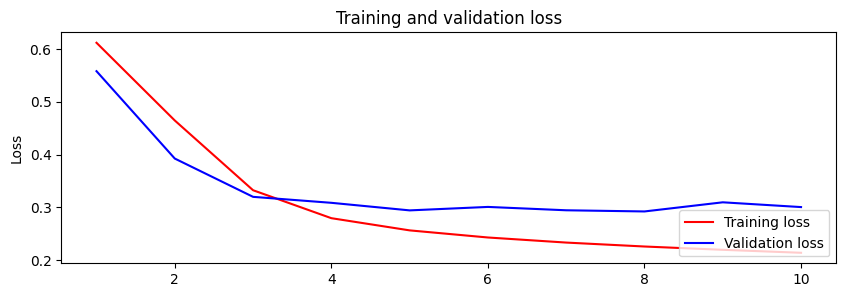

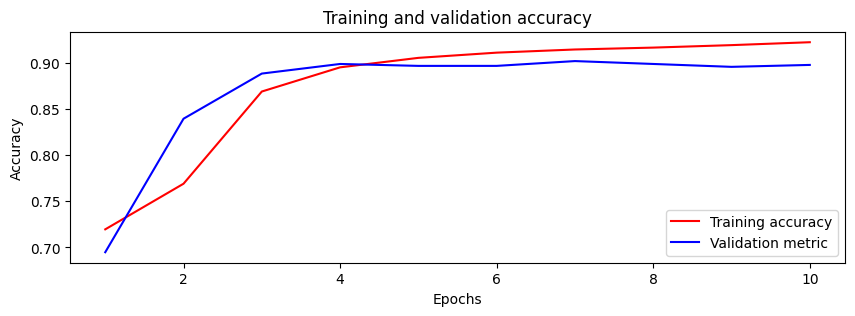

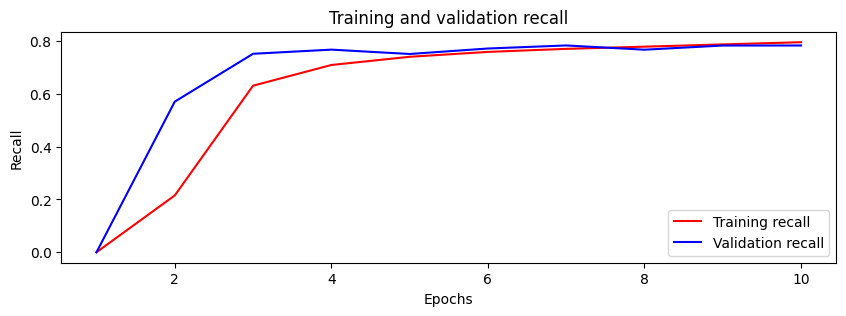

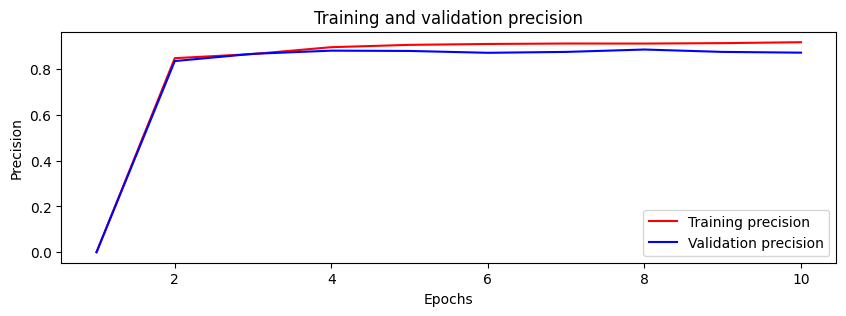

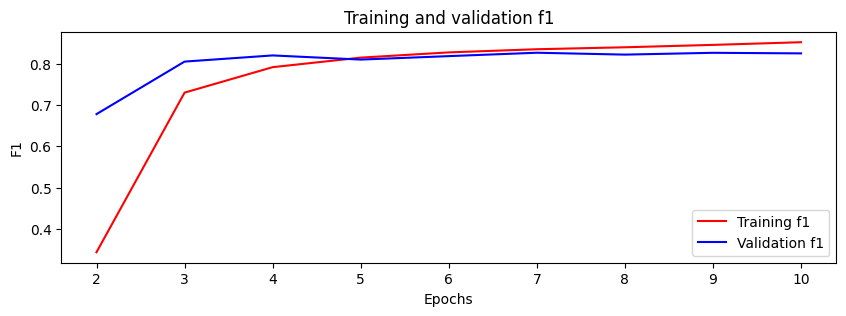

In [ ]:
loss = history_dict['loss']
val_loss = history_dict['val_loss']

accuracy = history_dict['binary_accuracy']
val_accuracy = history_dict['val_binary_accuracy']

recall = history_dict['recall']
val_recall = history_dict['val_recall']

precision = history_dict['precision']
val_precision = history_dict['val_precision']

f1 = [2 * i * j / (i + j) if (i + j) > 0 else None for i,j in zip(recall, precision) ]
val_f1 = [2 * i * j / (i + j) if (i + j) > 0 else None for i,j in zip(val_recall, val_precision)]

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(10, 3))
fig.tight_layout()
# r is for "solid red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.show()
plt.close()

fig = plt.figure(figsize=(10, 3))
fig.tight_layout()
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation metric')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()
plt.close()

fig = plt.figure(figsize=(10, 3))
fig.tight_layout()
plt.plot(epochs, recall, 'r', label='Training recall')
plt.plot(epochs, val_recall, 'b', label='Validation recall')
plt.title('Training and validation recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend(loc='lower right')
plt.show()
plt.close()

fig = plt.figure(figsize=(10, 3))
fig.tight_layout()
plt.plot(epochs, precision, 'r', label='Training precision')
plt.plot(epochs, val_precision, 'b', label='Validation precision')
plt.title('Training and validation precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend(loc='lower right')
plt.show()
plt.close()

fig = plt.figure(figsize=(10, 3))
fig.tight_layout()
plt.plot(epochs, f1, 'r', label='Training f1')
plt.plot(epochs, val_f1, 'b', label='Validation f1')
plt.title('Training and validation f1')
plt.xlabel('Epochs')
plt.ylabel('F1')
plt.legend(loc='lower right')
plt.show()
plt.close()

In [ ]:
#Stack two or more LSTM layers

In [ ]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(len(encoder.get_vocabulary()), 64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

In [ ]:

model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=metrics)

In [ ]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/10
338/338 [==============================] - 70s 140ms/step - loss: 0.6232 - binary_accuracy: 0.7528 - recall: 0.1594 - precision: 0.8320 - val_loss: 0.5738 - val_binary_accuracy: 0.6917 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 2/10
338/338 [==============================] - 33s 98ms/step - loss: 0.4691 - binary_accuracy: 0.7686 - recall: 0.2247 - precision: 0.8183 - val_loss: 0.3977 - val_binary_accuracy: 0.8375 - val_recall: 0.6047 - val_precision: 0.8211
Epoch 3/10
338/338 [==============================] - 35s 105ms/step - loss: 0.3351 - binary_accuracy: 0.8728 - recall: 0.6533 - precision: 0.8592 - val_loss: 0.3498 - val_binary_accuracy: 0.8750 - val_recall: 0.7365 - val_precision: 0.8385
Epoch 4/10
338/338 [==============================] - 34s 100ms/step - loss: 0.2868 - binary_accuracy: 0.9009 - recall: 0.7429 - precision: 0.8850 - val_loss: 0.3321 - val_binary_accuracy: 0.8896 - val_recall: 0.7534 - val_precision: 0.8711
Epoch 5/10
338/338 [=========

In [ ]:
loss, accuracy, recall, precision = model.evaluate(test_dataset)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1: {2 * recall * precision / (recall + precision)}')

85/85 [==============================] - 2s 20ms/step - loss: 0.3385 - binary_accuracy: 0.8828 - recall: 0.7771 - precision: 0.8161
Loss: 0.3384571969509125
Accuracy: 0.8828327655792236
Recall: 0.7770780920982361
Precision: 0.8161375522613525
F1: 0.7961290290441522


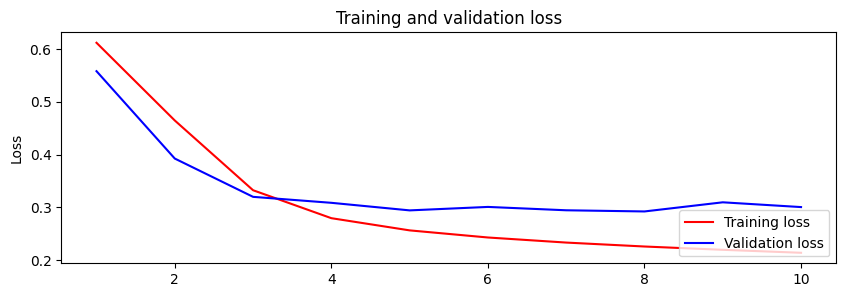

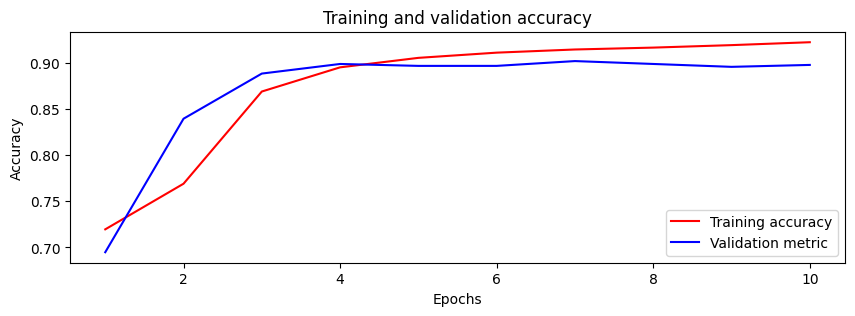

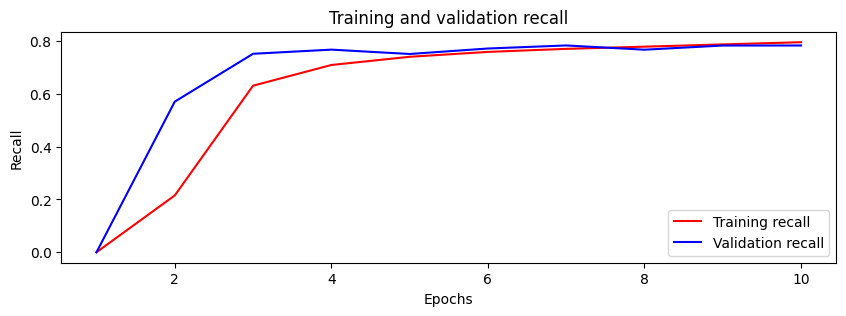

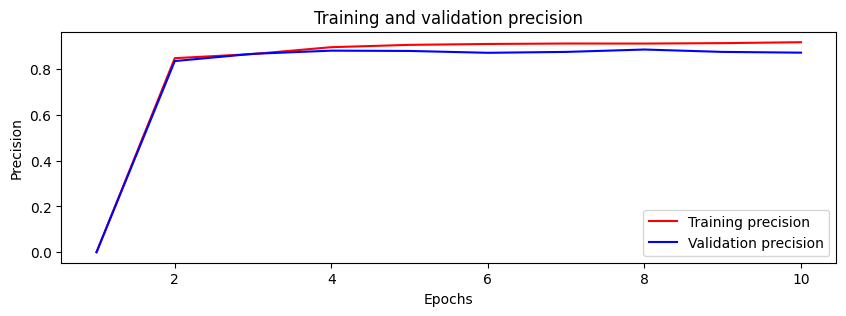

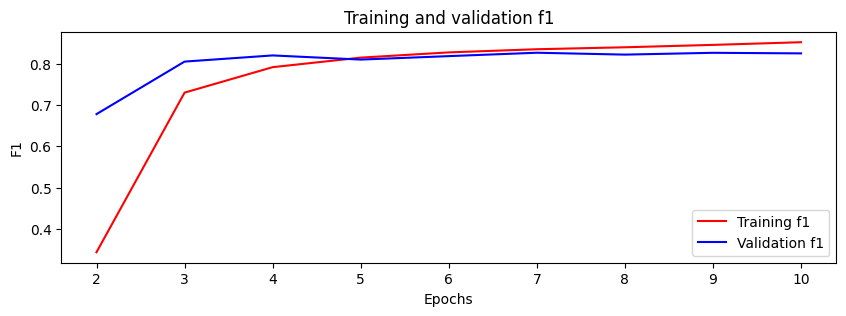

In [ ]:
loss = history_dict['loss']
val_loss = history_dict['val_loss']

accuracy = history_dict['binary_accuracy']
val_accuracy = history_dict['val_binary_accuracy']

recall = history_dict['recall']
val_recall = history_dict['val_recall']

precision = history_dict['precision']
val_precision = history_dict['val_precision']

f1 = [2 * i * j / (i + j) if (i + j) > 0 else None for i,j in zip(recall, precision) ]
val_f1 = [2 * i * j / (i + j) if (i + j) > 0 else None for i,j in zip(val_recall, val_precision)]

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(10, 3))
fig.tight_layout()
# r is for "solid red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.show()
plt.close()

fig = plt.figure(figsize=(10, 3))
fig.tight_layout()
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation metric')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()
plt.close()

fig = plt.figure(figsize=(10, 3))
fig.tight_layout()
plt.plot(epochs, recall, 'r', label='Training recall')
plt.plot(epochs, val_recall, 'b', label='Validation recall')
plt.title('Training and validation recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend(loc='lower right')
plt.show()
plt.close()

fig = plt.figure(figsize=(10, 3))
fig.tight_layout()
plt.plot(epochs, precision, 'r', label='Training precision')
plt.plot(epochs, val_precision, 'b', label='Validation precision')
plt.title('Training and validation precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend(loc='lower right')
plt.show()
plt.close()

fig = plt.figure(figsize=(10, 3))
fig.tight_layout()
plt.plot(epochs, f1, 'r', label='Training f1')
plt.plot(epochs, val_f1, 'b', label='Validation f1')
plt.title('Training and validation f1')
plt.xlabel('Epochs')
plt.ylabel('F1')
plt.legend(loc='lower right')
plt.show()
plt.close()

In [ ]:
# A dependency of the preprocessing for BERT inputs
!pip install -q -U "tensorflow-text==2.11.*"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 39.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 82.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 67.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 79.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 kB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 93.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 55.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-datasets 4.9.2 requires protobuf>=3.20, but you have protobuf 3.19.6 which is incompatible.
tensorflow-metadata 1.14.0 requires protobuf<4.21,>=3.20.3, but you have protobuf 3.

In [ ]:
!pip install -q tf-models-official

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 45.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 479.7/479.7 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 62.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.6/311.6 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 65.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 73.8 MB/s eta 0:00:00


In [ ]:
import os
import shutil

import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', None)

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization  # to create AdamW optimizer

import matplotlib.pyplot as plt

tf.get_logger().setLevel('ERROR')


In [ ]:
#@title Choose a BERT model to fine-tune

bert_model_name = 'talking-heads_base'  #@param ["bert_en_uncased_L-12_H-768_A-12", "bert_en_cased_L-12_H-768_A-12", "bert_multi_cased_L-12_H-768_A-12", "small_bert/bert_en_uncased_L-2_H-128_A-2", "small_bert/bert_en_uncased_L-2_H-256_A-4", "small_bert/bert_en_uncased_L-2_H-512_A-8", "small_bert/bert_en_uncased_L-2_H-768_A-12", "small_bert/bert_en_uncased_L-4_H-128_A-2", "small_bert/bert_en_uncased_L-4_H-256_A-4", "small_bert/bert_en_uncased_L-4_H-512_A-8", "small_bert/bert_en_uncased_L-4_H-768_A-12", "small_bert/bert_en_uncased_L-6_H-128_A-2", "small_bert/bert_en_uncased_L-6_H-256_A-4", "small_bert/bert_en_uncased_L-6_H-512_A-8", "small_bert/bert_en_uncased_L-6_H-768_A-12", "small_bert/bert_en_uncased_L-8_H-128_A-2", "small_bert/bert_en_uncased_L-8_H-256_A-4", "small_bert/bert_en_uncased_L-8_H-512_A-8", "small_bert/bert_en_uncased_L-8_H-768_A-12", "small_bert/bert_en_uncased_L-10_H-128_A-2", "small_bert/bert_en_uncased_L-10_H-256_A-4", "small_bert/bert_en_uncased_L-10_H-512_A-8", "small_bert/bert_en_uncased_L-10_H-768_A-12", "small_bert/bert_en_uncased_L-12_H-128_A-2", "small_bert/bert_en_uncased_L-12_H-256_A-4", "small_bert/bert_en_uncased_L-12_H-512_A-8", "small_bert/bert_en_uncased_L-12_H-768_A-12", "albert_en_base", "electra_small", "electra_base", "experts_pubmed", "experts_wiki_books", "talking-heads_base"]

map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')


BERT model selected           : https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


In [ ]:

AUTOTUNE = tf.data.AUTOTUNE
batch_size = 32
seed = 42

raw_train_ds = tf.keras.utils.text_dataset_from_directory(
    'knowledge_data',
    batch_size=batch_size,
    validation_split=0.2,
    subset='training',
    seed=seed)

class_names = raw_train_ds.class_names
train_ds = raw_train_ds.cache().prefetch(buffer_size=AUTOTUNE)

val_ds = tf.keras.utils.text_dataset_from_directory(
    'knowledge_data',
    batch_size=batch_size,
    validation_split=0.2,
    subset='validation',
    seed=seed)

val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

test_ds = val_ds

Found 13489 files belonging to 2 classes.
Using 10792 files for training.
Found 13489 files belonging to 2 classes.
Using 2697 files for validation.


In [ ]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)

In [ ]:
bert_model = hub.KerasLayer(tfhub_handle_encoder)

In [ ]:
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(1, activation=None, name='classifier')(net)
  return tf.keras.Model(text_input, net)

In [ ]:
classifier_model = build_classifier_model()

In [ ]:
bert_raw_result = classifier_model(tf.constant(test_ds))
print(tf.sigmoid(bert_raw_result))

ValueError: ignored

In [ ]:
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)

accuracy = tf.metrics.BinaryAccuracy()
recall = tf.metrics.Recall()
precision = tf.metrics.Precision()
metrics = [accuracy, recall, precision]

In [ ]:
epochs = 5
steps_per_epoch = tf.data.experimental.cardinality(train_ds).numpy()
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [ ]:

classifier_model.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics)

In [ ]:
print(f'Training model with {tfhub_handle_encoder}')
history = classifier_model.fit(x=train_ds,
                               validation_data=val_ds,
                               epochs=epochs)

In [ ]:

loss, accuracy, recall, precision = classifier_model.evaluate(test_ds)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1: {2 * recall * precision / (recall + precision)}')

In [ ]:
history_dict = history.history
print(history_dict.keys())

In [ ]:
loss = history_dict['loss']
val_loss = history_dict['val_loss']

accuracy = history_dict['binary_accuracy']
val_accuracy = history_dict['val_binary_accuracy']

recall = history_dict['recall']
val_recall = history_dict['val_recall']

precision = history_dict['precision']
val_precision = history_dict['val_precision']

f1 = [2 * i * j / (i + j) for i,j in zip(recall, precision)]
val_f1 = [2 * i * j / (i + j) for i,j in zip(val_recall, val_precision)]

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(10, 3))
fig.tight_layout()
# r is for "solid red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.show()
plt.close()

fig = plt.figure(figsize=(10, 3))
fig.tight_layout()
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation metric')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()
plt.close()

fig = plt.figure(figsize=(10, 3))
fig.tight_layout()
plt.plot(epochs, recall, 'r', label='Training recall')
plt.plot(epochs, val_recall, 'b', label='Validation recall')
plt.title('Training and validation recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend(loc='lower right')
plt.show()
plt.close()

fig = plt.figure(figsize=(10, 3))
fig.tight_layout()
plt.plot(epochs, precision, 'r', label='Training precision')
plt.plot(epochs, val_precision, 'b', label='Validation precision')
plt.title('Training and validation precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend(loc='lower right')
plt.show()
plt.close()

fig = plt.figure(figsize=(10, 3))
fig.tight_layout()
plt.plot(epochs, f1, 'r', label='Training f1')
plt.plot(epochs, val_f1, 'b', label='Validation f1')
plt.title('Training and validation f1')
plt.xlabel('Epochs')
plt.ylabel('F1')
plt.legend(loc='lower right')
plt.show()
plt.close()

In [ ]:
###############albert_en_base###################################################

In [ ]:

# A dependency of the preprocessing for BERT inputs
!pip install -q -U "tensorflow-text==2.11.*"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 51.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 68.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 kB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 83.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 55.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-datasets 4.9.2 requires protobuf>=3.20, but you have protobuf 3.19.6 which is incompatible.
tensorflow-metadata 1.14.0 requires protobuf<4.21,>=3.20.3, but you have protobuf 3.

In [ ]:
!pip install -q tf-models-official

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 71.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 94.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 85.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.6/311.6 kB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 108.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 45.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 111.5 MB/s eta 0:00:0

In [ ]:
import os
import shutil

import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', None)

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization  # to create AdamW optimizer

import matplotlib.pyplot as plt

tf.get_logger().setLevel('ERROR')


In [ ]:
df = pd.read_csv('training_data.csv')
df = df.groupby('Variables').max().reset_index()

print('10 random samples:')
display(df.sample(10))

print('labels:')
print(df['performance'].value_counts())

10 random samples:


,Variables,Unnamed: 0.1,Unnamed: 0,Causal-relation ID,Causal-relation text,Role in the text,expertA_level0,expertA_level1,expertB_level2,expertB_level0,...,expertB_level2.1,Label,Label1,Label2,Label_f,performance,Label1_f,Level1,Label2_f,Level2
8790,lower consumer spend in response to the economic environment,10186,10186,RF_Golnaz_Alice_265,"Additionally, lower consumer spend in response to the economic environment contributed to deposit growth.",cause,NP,NP,NP,NP,...,NP,P,CUS,NP,P,1,CUS,0,NP,11
4716,"added JPMorgan Chase & Co.SunTrust Banks, Inc was removed from the Company's peer groups",12302,12302,TFC_Golnaz_Alice_213,"During the most recent update to the industry peer group, Truist removed Capital One Financial Corporation and Huntington Bancshares, Incorporated, and added JPMorgan Chase & Co.SunTrust Banks, Inc was removed from the Company's peer groups due to the Merger.",outcome,NP,NP,NP,NP,...,NP,NP,NP,NP,NP,0,NP,3,NP,11
7403,gain access to our data or that of our customers or third parties with whom we interact,2719,2719,COF_Ryan _9,"Any of these parties may also attempt to fraudulently induce employees, customers or other third-party users of our systems to disclose sensitive information in order to gain access to our data or that of our customers or third parties with whom we interact, or to unlawfully obtain monetary benefit through misdirected or otherwise improper payment",outcome,NP,NP,NP,NP,...,NP,P,CUS,NP,P,1,CUS,0,NP,11
3397,Shareholder servicing feesdecreased$21.2millionin fiscal year2020,1578,1578,BEN_Jordan_32,Shareholder servicing feesdecreased$21.2millionin fiscal year2020primarily due to lower levels of related AUM and transactions,outcome,P,INV,INV1,P,...,INV1,P,INV,INV1,P,1,INV,2,INV1,7
1363,"Average commercial construction loans increased $381million, or 8%, from December31, 2018",3157,3157,FITB_Jordan_31,"Average commercial construction loans increased $381million, or 8%, from December31, 2018 primarily as a result of the acquisition of MB Financial, Inc",outcome,P,INV,INV1,P,...,INV1,P,INV,INV1,P,1,INV,2,INV1,7
3228,Reclassifying loans from held for investment to held for sale also requires that the affected loans be marked to the lower of cost or fair value.,10013,10013,RF_Golnaz_Alice_265,"Reclassifying loans from held for investment to held for sale also requires that the affected loans be marked to the lower of cost or fair value. As a result, any loans classified as held for sale may be adversely affected by changes in interest rates and by changes in the borrowers creditworthiness.",cause,NP,NP,NP,NP,...,NP,P,INV,NP,P,1,INV,2,NP,11
7850,"hurricanes, windstorms, earthquakes, hail, tornadoes, explosions, severe winter weather, fires and man-made events such as terrorist attacks may harm our business, results of operations or financial condition",6514,6514,MET_Golnaz_Alice_318,"Catastrophe losses as a result of hurricanes, windstorms, earthquakes, hail, tornadoes, explosions, severe winter weather, fires and man-made events such as terrorist attacks may harm our business, results of operations or financial condition.",cause,NP,NP,NP,NP,...,NP,P,INV,NP,P,1,INV,2,NP,11
11622,"the Companys interactions with and reliance on third parties, is not limited to the Companys own internal operational functions.",12256,12256,TFC_Golnaz_Alice_213,"The potential for operational risk exposure exists throughout the Companys business and, as a result of the Companys interactions with and reliance on third parties, is not limited to the Companys own internal operational functions.",cause,NP,NP,NP,NP,...,NP,NP,NP,NP,NP,0,NP,3,NP,11
3885,"Third parties may also attempt to place individuals within State Street or fraudulently induce employees, vendors, clients or other users of our systems to disclose sensitive information",11416,11416,STT_Golnaz_Alice_240,"Third parties may also attempt to place individuals within State Street or fraudulently induce employees, vendors, clients or other users of our systems to disc

labels:
0    9669
1    3820
Name: performance, dtype: int64


In [ ]:
!mkdir knowledge_data
!mkdir knowledge_data/neg
!mkdir knowledge_data/pos

In [ ]:
for i in df[df['performance']==0].index:
  txt = df.iloc[i]['Variables']
  text_file = open(f"knowledge_data/neg/{i}.txt", "wt")
  text_file.write(txt)
  text_file.close()
for i in df[df['performance']==1].index:
  txt = df.iloc[i]['Variables']
  text_file = open(f"knowledge_data/pos/{i}.txt", "wt")
  text_file.write(txt)
  text_file.close()

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
batch_size = 32
seed = 42

raw_train_ds = tf.keras.utils.text_dataset_from_directory(
    'knowledge_data',
    batch_size=batch_size,
    validation_split=0.2,
    subset='training',
    seed=seed)

class_names = raw_train_ds.class_names
train_ds = raw_train_ds.cache().prefetch(buffer_size=AUTOTUNE)

val_ds = tf.keras.utils.text_dataset_from_directory(
    'knowledge_data',
    batch_size=batch_size,
    validation_split=0.2,
    subset='validation',
    seed=seed)

val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

test_ds = val_ds

Found 13489 files belonging to 2 classes.
Using 10792 files for training.
Found 13489 files belonging to 2 classes.
Using 2697 files for validation.


In [ ]:
#@title Choose a BERT model to fine-tune

bert_model_name = 'albert_en_base'  #@param ["bert_en_uncased_L-12_H-768_A-12", "bert_en_cased_L-12_H-768_A-12", "bert_multi_cased_L-12_H-768_A-12", "small_bert/bert_en_uncased_L-2_H-128_A-2", "small_bert/bert_en_uncased_L-2_H-256_A-4", "small_bert/bert_en_uncased_L-2_H-512_A-8", "small_bert/bert_en_uncased_L-2_H-768_A-12", "small_bert/bert_en_uncased_L-4_H-128_A-2", "small_bert/bert_en_uncased_L-4_H-256_A-4", "small_bert/bert_en_uncased_L-4_H-512_A-8", "small_bert/bert_en_uncased_L-4_H-768_A-12", "small_bert/bert_en_uncased_L-6_H-128_A-2", "small_bert/bert_en_uncased_L-6_H-256_A-4", "small_bert/bert_en_uncased_L-6_H-512_A-8", "small_bert/bert_en_uncased_L-6_H-768_A-12", "small_bert/bert_en_uncased_L-8_H-128_A-2", "small_bert/bert_en_uncased_L-8_H-256_A-4", "small_bert/bert_en_uncased_L-8_H-512_A-8", "small_bert/bert_en_uncased_L-8_H-768_A-12", "small_bert/bert_en_uncased_L-10_H-128_A-2", "small_bert/bert_en_uncased_L-10_H-256_A-4", "small_bert/bert_en_uncased_L-10_H-512_A-8", "small_bert/bert_en_uncased_L-10_H-768_A-12", "small_bert/bert_en_uncased_L-12_H-128_A-2", "small_bert/bert_en_uncased_L-12_H-256_A-4", "small_bert/bert_en_uncased_L-12_H-512_A-8", "small_bert/bert_en_uncased_L-12_H-768_A-12", "albert_en_base", "electra_small", "electra_base", "experts_pubmed", "experts_wiki_books", "talking-heads_base"]

map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')


BERT model selected           : https://tfhub.dev/tensorflow/albert_en_base/2
Preprocess model auto-selected: https://tfhub.dev/tensorflow/albert_en_preprocess/3


In [ ]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)

In [ ]:
bert_model = hub.KerasLayer(tfhub_handle_encoder)

In [ ]:
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='Variables')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(1, activation=None, name='classifier')(net)
  return tf.keras.Model(text_input, net)


In [ ]:
classifier_model = build_classifier_model()

In [ ]:
#test_ds

In [ ]:
# classifier_model = build_classifier_model()
# bert_raw_result = classifier_model(tf.constant(test_ds))
# print(tf.sigmoid(bert_raw_result))

In [ ]:
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)

accuracy = tf.metrics.BinaryAccuracy()
recall = tf.metrics.Recall()
precision = tf.metrics.Precision()
metrics = [accuracy, recall, precision]

In [ ]:
epochs = 5
steps_per_epoch = tf.data.experimental.cardinality(train_ds).numpy()
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [ ]:
classifier_model.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics)

In [ ]:
print(f'Training model with {tfhub_handle_encoder}')
history = classifier_model.fit(x=train_ds,
                               validation_data=val_ds,
                               epochs=epochs)


Training model with https://tfhub.dev/tensorflow/albert_en_base/2
Epoch 1/5
338/338 [==============================] - 418s 1s/step - loss: 0.4086 - binary_accuracy: 0.8313 - recall: 0.5023 - precision: 0.8283 - val_loss: 0.2925 - val_binary_accuracy: 0.8888 - val_recall: 0.8123 - val_precision: 0.8103
Epoch 2/5
338/338 [==============================] - 401s 1s/step - loss: 0.2556 - binary_accuracy: 0.9086 - recall: 0.7650 - precision: 0.8938 - val_loss: 0.2408 - val_binary_accuracy: 0.9177 - val_recall: 0.8149 - val_precision: 0.8961
Epoch 3/5
338/338 [==============================] - 400s 1s/step - loss: 0.1966 - binary_accuracy: 0.9295 - recall: 0.8229 - precision: 0.9171 - val_loss: 0.2780 - val_binary_accuracy: 0.9106 - val_recall: 0.8753 - val_precision: 0.8303
Epoch 4/5
338/338 [==============================] - 400s 1s/step - loss: 0.1462 - binary_accuracy: 0.9494 - recall: 0.8810 - precision: 0.9348 - val_loss: 0.2754 - val_binary_accuracy: 0.9169 - val_recall: 0.8690 - val_

In [ ]:
loss, accuracy, recall, precision = classifier_model.evaluate(test_ds)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1: {2 * recall * precision / (recall + precision)}')

85/85 [==============================] - 29s 339ms/step - loss: 0.2981 - binary_accuracy: 0.9244 - recall: 0.8463 - precision: 0.8912
Loss: 0.2980676293373108
Accuracy: 0.9243603944778442
Recall: 0.8463476300239563
Precision: 0.8912466764450073
F1: 0.8682170625993967


In [ ]:

history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'binary_accuracy', 'recall', 'precision', 'val_loss', 'val_binary_accuracy', 'val_recall', 'val_precision'])


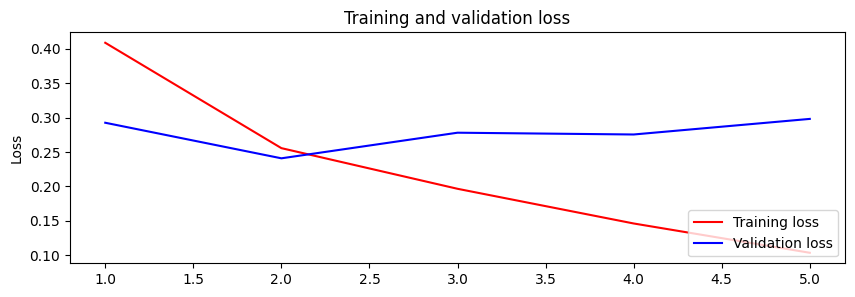

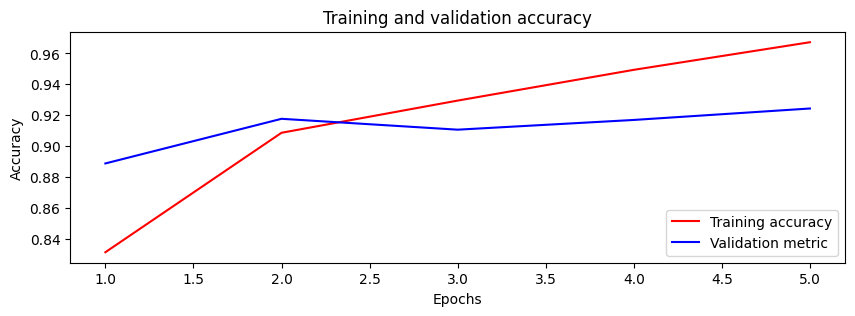

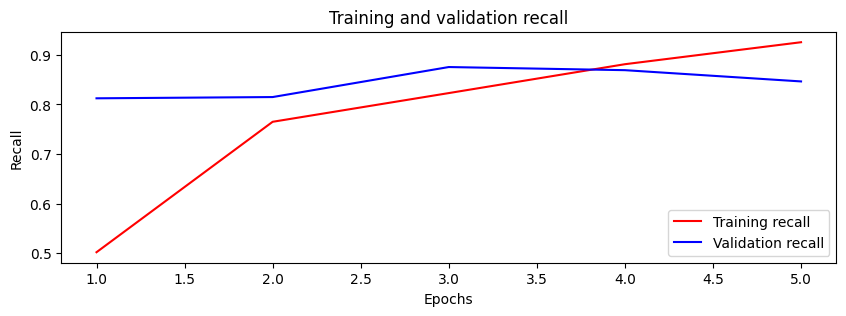

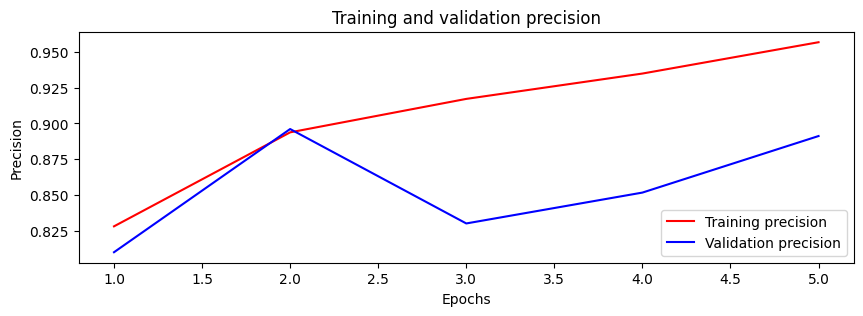

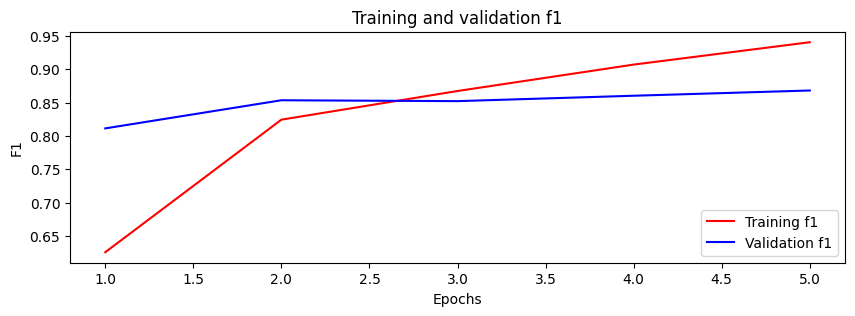

In [ ]:
loss = history_dict['loss']
val_loss = history_dict['val_loss']

accuracy = history_dict['binary_accuracy']
val_accuracy = history_dict['val_binary_accuracy']

recall = history_dict['recall']
val_recall = history_dict['val_recall']

precision = history_dict['precision']
val_precision = history_dict['val_precision']

f1 = [2 * i * j / (i + j) for i,j in zip(recall, precision)]
val_f1 = [2 * i * j / (i + j) for i,j in zip(val_recall, val_precision)]

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(10, 3))
fig.tight_layout()
# r is for "solid red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.show()
plt.close()

fig = plt.figure(figsize=(10, 3))
fig.tight_layout()
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation metric')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()
plt.close()

fig = plt.figure(figsize=(10, 3))
fig.tight_layout()
plt.plot(epochs, recall, 'r', label='Training recall')
plt.plot(epochs, val_recall, 'b', label='Validation recall')
plt.title('Training and validation recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend(loc='lower right')
plt.show()
plt.close()

fig = plt.figure(figsize=(10, 3))
fig.tight_layout()
plt.plot(epochs, precision, 'r', label='Training precision')
plt.plot(epochs, val_precision, 'b', label='Validation precision')
plt.title('Training and validation precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend(loc='lower right')
plt.show()
plt.close()

fig = plt.figure(figsize=(10, 3))
fig.tight_layout()
plt.plot(epochs, f1, 'r', label='Training f1')
plt.plot(epochs, val_f1, 'b', label='Validation f1')
plt.title('Training and validation f1')
plt.xlabel('Epochs')
plt.ylabel('F1')
plt.legend(loc='lower right')
plt.show()
plt.close()

In [ ]:
#Bert_en_cased

In [ ]:
# A dependency of the preprocessing for BERT inputs
!pip install -q -U "tensorflow-text==2.11.*"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 48.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 73.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 54.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 94.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 kB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 99.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 58.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-datasets 4.9.2 requires protobuf>=3.20, but you have protobuf 3.19.6 which is incompatible.
tensorflow-metadata 1.14.0 requires protobuf<4.21,>=3.20.3, but you have protobuf 3.

In [ ]:
!pip install -q tf-models-official

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 38.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.6/311.6 kB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 51.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 66.3 MB/s eta 0:00:00
 

In [ ]:
import os
import shutil

import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', None)

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization  # to create AdamW optimizer

import matplotlib.pyplot as plt

tf.get_logger().setLevel('ERROR')

In [ ]:
df = pd.read_csv('training_data.csv')
df = df.groupby('Variables').max().reset_index()

print('10 random samples:')
display(df.sample(10))

print('labels:')
print(df['performance'].value_counts())

10 random samples:


,Variables,Unnamed: 0.1,Unnamed: 0,Causal-relation ID,Causal-relation text,Role in the text,expertA_level0,expertA_level1,expertB_level2,expertB_level0,...,expertB_level2.1,Label,Label1,Label2,Label_f,performance,Label1_f,Level1,Label2_f,Level2
3767,The process of establishing loss reserves is complex and inherently imprecise,251,251,AIG_Ryan_1,The process of establishing loss reserves is complex and inherently imprecise because it must take into consideration many variables that are subject to the outcome of future events,outcome,NP,NP,NP,NP,...,NP,NP,NP,NP,NP,0,NP,3,NP,11
10811,responsible for advising Citis lines of business and control functions,2909,2909,C_Jordan_18,Citi Legal is responsible for advising Citis lines of business and control functions in order to facilitate the prudent management of Citis exposure to legal risk,cause,NP,NP,NP,NP,...,NP,NP,NP,NP,NP,0,NP,3,NP,11
599,issuers of the securities may have the right to call or prepay obligations with or without call or prepayment penalties,586,586,AIZ_Ryan_53,Actual maturities may differ from contractual maturities because issuers of the securities may have the right to call or prepay obligations with or without call or prepayment penalties,cause,NP,NP,NP,NP,...,NP,NP,NP,NP,NP,0,NP,3,NP,11
8258,"incurred losses from such events and the demand, price and availability of reinsurance coverages for automobile and homeowners insurance may be affected",765,765,ALL_Ryan_3,"There could also be more frequent wildfires in certain geographies, more flooding and the potential for increased severity of hurricanesdue to higher sea surface temperatures. as a result, incurred losses from such events and the demand, price and availability of reinsurance coverages for automobile and homeowners insurance may be affected",outcome,NP,NP,NP,NP,...,NP,P,INV,NP,P,1,INV,2,NP,11
3493,Technology and communications expenses increased by $2.9 million primarily,7214,7214,MKTX_Golnaz_Alice_113,"Technology and communications expenses increased by $2.9 million primarily due to increases in software subscription costs of $1.2 million, data center and cloud hosting of $0.9 million and market data costs of $0.8 million.",outcome,P,INV,INV1,P,...,INV1,P,INV,INV1,P,1,INV,2,INV1,7
1593,Changes in market interest rates,11983,11983,SYF_Golnaz_Alice_168,"Changes in market interest rates cause our net interest income to increase or decrease, as some of our assets and liabilities carry interest rates that fluctuate with market benchmarks.",cause,NP,NP,NP,NP,...,NP,P,INV,NP,P,1,INV,2,NP,11
439,differences in how riskless and credit-sensitive rates like LIBOR behave,9648,9648,PNC_Punit_Alice_51,Changing to SOFR or another riskless rate will contribute to the value transfer risk due to the differences in how riskless and credit-sensitive rates like LIBOR behave,cause,NP,NP,NP,NP,...,NP,NP,NP,NP,NP,0,NP,3,NP,11
562,increases in supply or decreases in demand for the asset or deterioration in the condition of the asset.,9670,9670,PNC_Punit_Alice_51,"Also, the underlying value of assets under lease or securing an obligation generally decreases due to increases in supply or decreases in demand for the asset or deterioration in the condition of the asset.",cause,NP,NP,NP,NP,...,NP,NP,NP,NP,NP,0,NP,3,NP,11
1690,"Company began adding hedges in 2018; however, they were designed to become effective beginning in 2020.",10079,10079,RF_Golnaz_Alice_265,"The Company began adding hedges in 2018; however, they were designed to become effective beginning in 2020. Therefore, the hedging strategy produced no benefits before 2020.",cause,P,UC,UC,P,...,UC,P,UC,UC,P,1,UC,5,UC,15
8784,lower claim severity than anticipated in the reserve estimates,6015,6015,L_Golnaz_Alice_221,The favorable claim reserve development was primarily due to lower claim severity than anticipated in the reserve estimates.,cause,NP,NP,NP,NP,...,NP,NP,NP,NP,NP,0,NP,3,NP,11


labels:
0    9669
1    3820
Name: performance, dtype: int64


In [ ]:
!mkdir knowledge_data
!mkdir knowledge_data/neg
!mkdir knowledge_data/pos

In [ ]:
for i in df[df['performance']==0].index:
  txt = df.iloc[i]['Variables']
  text_file = open(f"knowledge_data/neg/{i}.txt", "wt")
  text_file.write(txt)
  text_file.close()
for i in df[df['performance']==1].index:
  txt = df.iloc[i]['Variables']
  text_file = open(f"knowledge_data/pos/{i}.txt", "wt")
  text_file.write(txt)
  text_file.close()

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
batch_size = 32
seed = 42

raw_train_ds = tf.keras.utils.text_dataset_from_directory(
    'knowledge_data',
    batch_size=batch_size,
    validation_split=0.2,
    subset='training',
    seed=seed)

class_names = raw_train_ds.class_names
train_ds = raw_train_ds.cache().prefetch(buffer_size=AUTOTUNE)

val_ds = tf.keras.utils.text_dataset_from_directory(
    'knowledge_data',
    batch_size=batch_size,
    validation_split=0.2,
    subset='validation',
    seed=seed)

val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

test_ds = val_ds

Found 13489 files belonging to 2 classes.
Using 10792 files for training.
Found 13489 files belonging to 2 classes.
Using 2697 files for validation.


In [ ]:
print(type(train_ds))

<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>


In [ ]:
#@title Choose a BERT model to fine-tune

bert_model_name = 'bert_en_uncased_L-12_H-768_A-12'  #@param ["bert_en_uncased_L-12_H-768_A-12", "bert_en_cased_L-12_H-768_A-12", "bert_multi_cased_L-12_H-768_A-12", "small_bert/bert_en_uncased_L-2_H-128_A-2", "small_bert/bert_en_uncased_L-2_H-256_A-4", "small_bert/bert_en_uncased_L-2_H-512_A-8", "small_bert/bert_en_uncased_L-2_H-768_A-12", "small_bert/bert_en_uncased_L-4_H-128_A-2", "small_bert/bert_en_uncased_L-4_H-256_A-4", "small_bert/bert_en_uncased_L-4_H-512_A-8", "small_bert/bert_en_uncased_L-4_H-768_A-12", "small_bert/bert_en_uncased_L-6_H-128_A-2", "small_bert/bert_en_uncased_L-6_H-256_A-4", "small_bert/bert_en_uncased_L-6_H-512_A-8", "small_bert/bert_en_uncased_L-6_H-768_A-12", "small_bert/bert_en_uncased_L-8_H-128_A-2", "small_bert/bert_en_uncased_L-8_H-256_A-4", "small_bert/bert_en_uncased_L-8_H-512_A-8", "small_bert/bert_en_uncased_L-8_H-768_A-12", "small_bert/bert_en_uncased_L-10_H-128_A-2", "small_bert/bert_en_uncased_L-10_H-256_A-4", "small_bert/bert_en_uncased_L-10_H-512_A-8", "small_bert/bert_en_uncased_L-10_H-768_A-12", "small_bert/bert_en_uncased_L-12_H-128_A-2", "small_bert/bert_en_uncased_L-12_H-256_A-4", "small_bert/bert_en_uncased_L-12_H-512_A-8", "small_bert/bert_en_uncased_L-12_H-768_A-12", "albert_en_base", "electra_small", "electra_base", "experts_pubmed", "experts_wiki_books", "talking-heads_base"]

map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


In [ ]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)

In [ ]:
bert_model = hub.KerasLayer(tfhub_handle_encoder)

In [ ]:
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(1, activation=None, name='classifier')(net)
  return tf.keras.Model(text_input, net)

In [ ]:
classifier_model = build_classifier_model()

In [ ]:
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)

accuracy = tf.metrics.BinaryAccuracy()
recall = tf.metrics.Recall()
precision = tf.metrics.Precision()
metrics = [accuracy, recall, precision]

In [ ]:
epochs = 5
steps_per_epoch = tf.data.experimental.cardinality(train_ds).numpy()
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [ ]:
classifier_model.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics)

In [ ]:
print(f'Training model with {tfhub_handle_encoder}')
history = classifier_model.fit(x=train_ds,
                               validation_data=val_ds,
                               epochs=epochs)

Training model with https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3
Epoch 1/5
338/338 [==============================] - 360s 997ms/step - loss: 0.3794 - binary_accuracy: 0.8391 - recall: 0.5023 - precision: 0.8686 - val_loss: 0.2602 - val_binary_accuracy: 0.9110 - val_recall: 0.8539 - val_precision: 0.8454
Epoch 2/5
338/338 [==============================] - 340s 1s/step - loss: 0.2054 - binary_accuracy: 0.9257 - recall: 0.8050 - precision: 0.9199 - val_loss: 0.2383 - val_binary_accuracy: 0.9240 - val_recall: 0.8615 - val_precision: 0.8780
Epoch 3/5
338/338 [==============================] - 340s 1s/step - loss: 0.1419 - binary_accuracy: 0.9492 - recall: 0.8685 - precision: 0.9460 - val_loss: 0.3112 - val_binary_accuracy: 0.9077 - val_recall: 0.9068 - val_precision: 0.8045
Epoch 4/5
338/338 [==============================] - 338s 999ms/step - loss: 0.0985 - binary_accuracy: 0.9692 - recall: 0.9250 - precision: 0.9638 - val_loss: 0.3183 - val_binary_accuracy: 0.9218 - va

In [ ]:
loss, accuracy, recall, precision = classifier_model.evaluate(test_ds)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1: {2 * recall * precision / (recall + precision)}')

85/85 [==============================] - 29s 344ms/step - loss: 0.3543 - binary_accuracy: 0.9251 - recall: 0.8602 - precision: 0.8824
Loss: 0.35430899262428284
Accuracy: 0.9251019358634949
Recall: 0.8602015376091003
Precision: 0.8824289441108704
F1: 0.8711734845883669


In [ ]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'binary_accuracy', 'recall', 'precision', 'val_loss', 'val_binary_accuracy', 'val_recall', 'val_precision'])


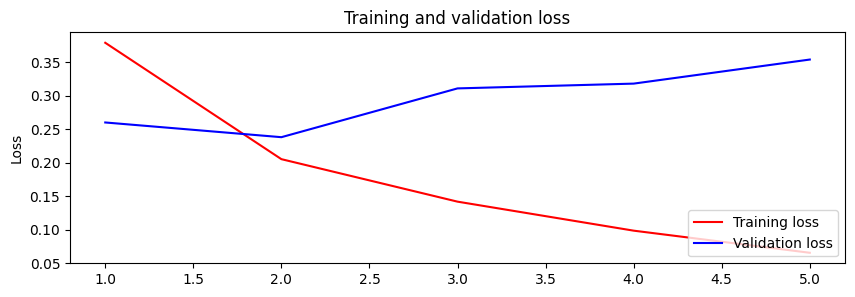

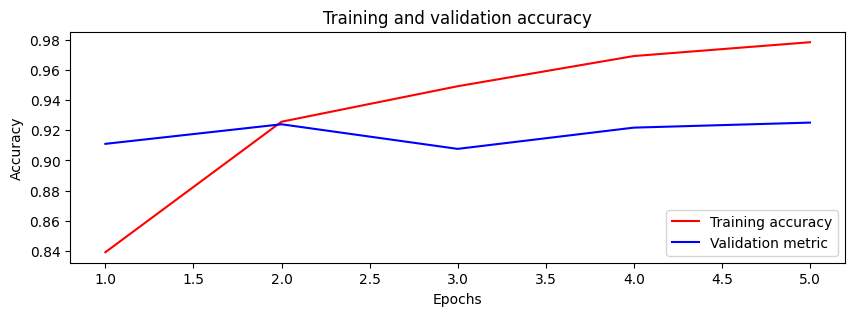

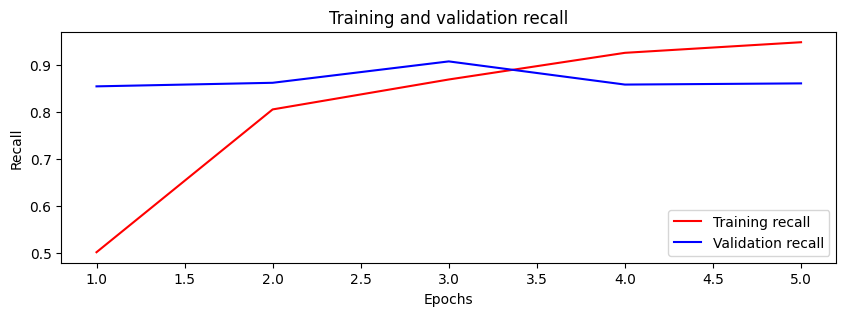

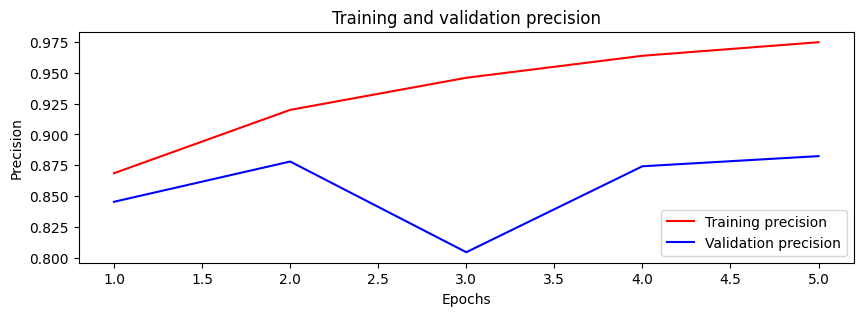

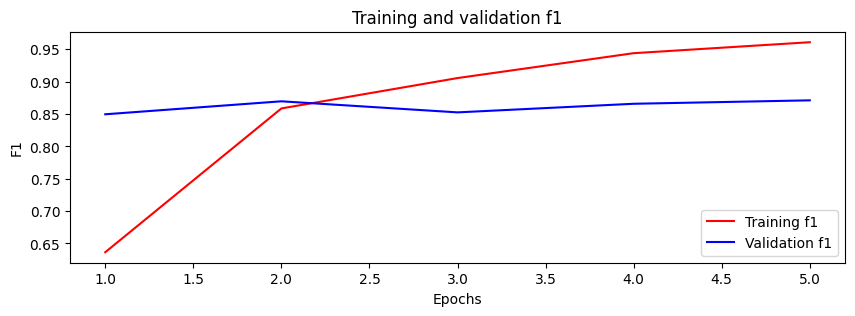

In [ ]:
loss = history_dict['loss']
val_loss = history_dict['val_loss']

accuracy = history_dict['binary_accuracy']
val_accuracy = history_dict['val_binary_accuracy']

recall = history_dict['recall']
val_recall = history_dict['val_recall']

precision = history_dict['precision']
val_precision = history_dict['val_precision']

f1 = [2 * i * j / (i + j) for i,j in zip(recall, precision)]
val_f1 = [2 * i * j / (i + j) for i,j in zip(val_recall, val_precision)]

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(10, 3))
fig.tight_layout()
# r is for "solid red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.show()
plt.close()

fig = plt.figure(figsize=(10, 3))
fig.tight_layout()
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation metric')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()
plt.close()

fig = plt.figure(figsize=(10, 3))
fig.tight_layout()
plt.plot(epochs, recall, 'r', label='Training recall')
plt.plot(epochs, val_recall, 'b', label='Validation recall')
plt.title('Training and validation recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend(loc='lower right')
plt.show()
plt.close()

fig = plt.figure(figsize=(10, 3))
fig.tight_layout()
plt.plot(epochs, precision, 'r', label='Training precision')
plt.plot(epochs, val_precision, 'b', label='Validation precision')
plt.title('Training and validation precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend(loc='lower right')
plt.show()
plt.close()

fig = plt.figure(figsize=(10, 3))
fig.tight_layout()
plt.plot(epochs, f1, 'r', label='Training f1')
plt.plot(epochs, val_f1, 'b', label='Validation f1')
plt.title('Training and validation f1')
plt.xlabel('Epochs')
plt.ylabel('F1')
plt.legend(loc='lower right')
plt.show()
plt.close()

In [ ]:
#############distilbert_en_uncased###################################

In [ ]:
#@title Choose a BERT model to fine-tune

bert_model_name = 'distilbert_en_uncased_L-6_H-768_A-12'  #@param ["distilbert_en_uncased_L-6_H-768_A-12", "bert_en_uncased_L-12_H-768_A-12", "bert_en_cased_L-12_H-768_A-12", "bert_multi_cased_L-12_H-768_A-12", "small_bert/bert_en_uncased_L-2_H-128_A-2", "small_bert/bert_en_uncased_L-2_H-256_A-4", "small_bert/bert_en_uncased_L-2_H-512_A-8", "small_bert/bert_en_uncased_L-2_H-768_A-12", "small_bert/bert_en_uncased_L-4_H-128_A-2", "small_bert/bert_en_uncased_L-4_H-256_A-4", "small_bert/bert_en_uncased_L-4_H-512_A-8", "small_bert/bert_en_uncased_L-4_H-768_A-12", "small_bert/bert_en_uncased_L-6_H-128_A-2", "small_bert/bert_en_uncased_L-6_H-256_A-4", "small_bert/bert_en_uncased_L-6_H-512_A-8", "small_bert/bert_en_uncased_L-6_H-768_A-12", "small_bert/bert_en_uncased_L-8_H-128_A-2", "small_bert/bert_en_uncased_L-8_H-256_A-4", "small_bert/bert_en_uncased_L-8_H-512_A-8", "small_bert/bert_en_uncased_L-8_H-768_A-12", "small_bert/bert_en_uncased_L-10_H-128_A-2", "small_bert/bert_en_uncased_L-10_H-256_A-4", "small_bert/bert_en_uncased_L-10_H-512_A-8", "small_bert/bert_en_uncased_L-10_H-768_A-12", "small_bert/bert_en_uncased_L-12_H-128_A-2", "small_bert/bert_en_uncased_L-12_H-256_A-4", "small_bert/bert_en_uncased_L-12_H-512_A-8", "small_bert/bert_en_uncased_L-12_H-768_A-12", "albert_en_base", "electra_small", "electra_base", "experts_pubmed", "experts_wiki_books", "talking-heads_base"]

map_name_to_handle = {
    'distilbert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/jeongukjae/distilbert_en_uncased_L-6_H-768_A-12/1',
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'distilbert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/jeongukjae/distilbert_en_uncased_preprocess/2',
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')


BERT model selected           : https://tfhub.dev/jeongukjae/distilbert_en_uncased_L-6_H-768_A-12/1
Preprocess model auto-selected: https://tfhub.dev/jeongukjae/distilbert_en_uncased_preprocess/2


In [ ]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)

In [ ]:
bert_model = hub.KerasLayer(tfhub_handle_encoder)

In [ ]:
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(1, activation=None, name='classifier')(net)
  return tf.keras.Model(text_input, net)

In [ ]:
classifier_model = build_classifier_model()

In [ ]:
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)

accuracy = tf.metrics.BinaryAccuracy()
recall = tf.metrics.Recall()
precision = tf.metrics.Precision()
metrics = [accuracy, recall, precision]

In [ ]:
epochs = 5
steps_per_epoch = tf.data.experimental.cardinality(train_ds).numpy()
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')



In [ ]:
classifier_model.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics)

In [ ]:
print(f'Training model with {tfhub_handle_encoder}')
history = classifier_model.fit(x=train_ds,
                               validation_data=val_ds,
                               epochs=epochs)

Training model with https://tfhub.dev/jeongukjae/distilbert_en_uncased_L-6_H-768_A-12/1
Epoch 1/5
338/338 [==============================] - 201s 548ms/step - loss: 0.3770 - binary_accuracy: 0.8372 - recall_1: 0.4970 - precision_1: 0.8649 - val_loss: 0.2433 - val_binary_accuracy: 0.9158 - val_recall_1: 0.8136 - val_precision_1: 0.8910
Epoch 2/5
338/338 [==============================] - 185s 548ms/step - loss: 0.2034 - binary_accuracy: 0.9247 - recall_1: 0.7925 - precision_1: 0.9284 - val_loss: 0.2555 - val_binary_accuracy: 0.9166 - val_recall_1: 0.8753 - val_precision_1: 0.8465
Epoch 3/5
338/338 [==============================] - 183s 541ms/step - loss: 0.1506 - binary_accuracy: 0.9461 - recall_1: 0.8526 - precision_1: 0.9499 - val_loss: 0.2943 - val_binary_accuracy: 0.9118 - val_recall_1: 0.8854 - val_precision_1: 0.8271
Epoch 4/5
338/338 [==============================] - 187s 553ms/step - loss: 0.1124 - binary_accuracy: 0.9607 - recall_1: 0.8976 - precision_1: 0.9597 - val_loss: 0.

In [ ]:
loss, accuracy, recall, precision = classifier_model.evaluate(test_ds)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1: {2 * recall * precision / (recall + precision)}')

85/85 [==============================] - 17s 204ms/step - loss: 0.3240 - binary_accuracy: 0.9207 - recall_1: 0.8615 - precision_1: 0.8680
Loss: 0.32402461767196655
Accuracy: 0.9206525683403015
Recall: 0.8614609837532043
Precision: 0.8680202960968018
F1: 0.8647282013461869


In [ ]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'binary_accuracy', 'recall_1', 'precision_1', 'val_loss', 'val_binary_accuracy', 'val_recall_1', 'val_precision_1'])


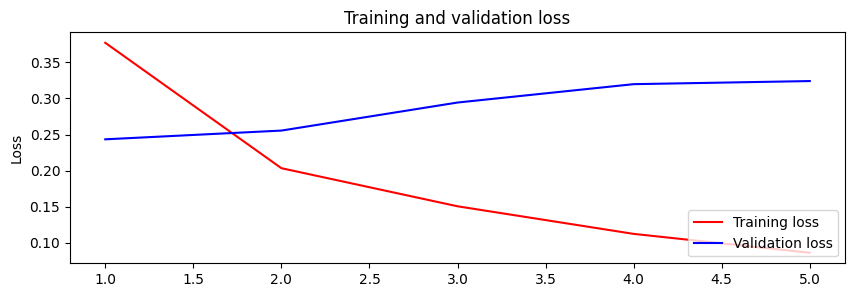

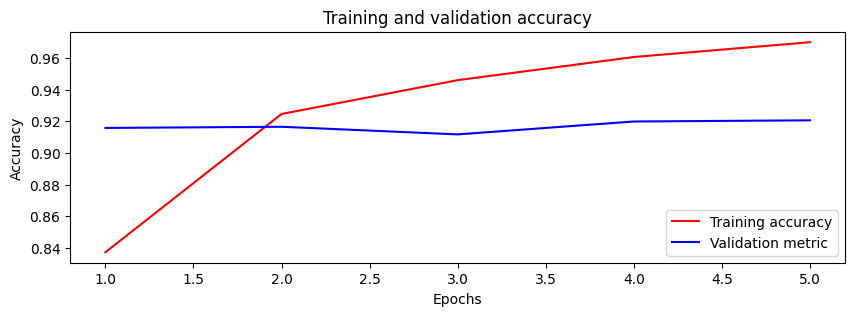

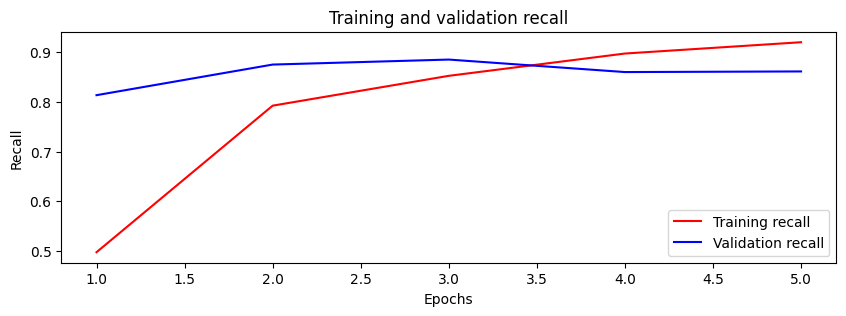

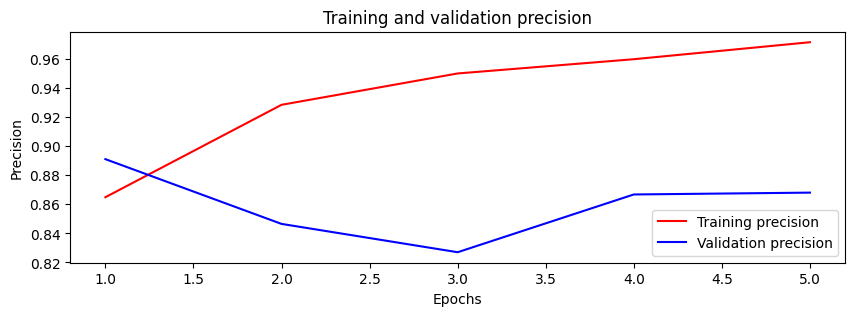

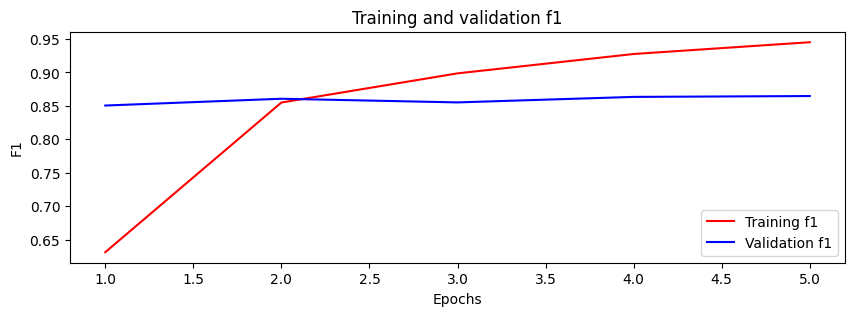

In [ ]:
loss = history_dict['loss']
val_loss = history_dict['val_loss']

accuracy = history_dict['binary_accuracy']
val_accuracy = history_dict['val_binary_accuracy']

recall = history_dict['recall_1']
val_recall = history_dict['val_recall_1']

precision = history_dict['precision_1']
val_precision = history_dict['val_precision_1']

f1 = [2 * i * j / (i + j) for i,j in zip(recall, precision)]
val_f1 = [2 * i * j / (i + j) for i,j in zip(val_recall, val_precision)]

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(10, 3))
fig.tight_layout()
# r is for "solid red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.show()
plt.close()

fig = plt.figure(figsize=(10, 3))
fig.tight_layout()
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation metric')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()
plt.close()

fig = plt.figure(figsize=(10, 3))
fig.tight_layout()
plt.plot(epochs, recall, 'r', label='Training recall')
plt.plot(epochs, val_recall, 'b', label='Validation recall')
plt.title('Training and validation recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend(loc='lower right')
plt.show()
plt.close()

fig = plt.figure(figsize=(10, 3))
fig.tight_layout()
plt.plot(epochs, precision, 'r', label='Training precision')
plt.plot(epochs, val_precision, 'b', label='Validation precision')
plt.title('Training and validation precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend(loc='lower right')
plt.show()
plt.close()

fig = plt.figure(figsize=(10, 3))
fig.tight_layout()
plt.plot(epochs, f1, 'r', label='Training f1')
plt.plot(epochs, val_f1, 'b', label='Validation f1')
plt.title('Training and validation f1')
plt.xlabel('Epochs')
plt.ylabel('F1')
plt.legend(loc='lower right')
plt.show()
plt.close()

In [ ]:
###########################experts_wiki_books############################################################

In [ ]:
#@title Choose a BERT model to fine-tune

bert_model_name = 'experts_wiki_books'  #@param ["bert_en_uncased_L-12_H-768_A-12", "bert_en_cased_L-12_H-768_A-12", "bert_multi_cased_L-12_H-768_A-12", "small_bert/bert_en_uncased_L-2_H-128_A-2", "small_bert/bert_en_uncased_L-2_H-256_A-4", "small_bert/bert_en_uncased_L-2_H-512_A-8", "small_bert/bert_en_uncased_L-2_H-768_A-12", "small_bert/bert_en_uncased_L-4_H-128_A-2", "small_bert/bert_en_uncased_L-4_H-256_A-4", "small_bert/bert_en_uncased_L-4_H-512_A-8", "small_bert/bert_en_uncased_L-4_H-768_A-12", "small_bert/bert_en_uncased_L-6_H-128_A-2", "small_bert/bert_en_uncased_L-6_H-256_A-4", "small_bert/bert_en_uncased_L-6_H-512_A-8", "small_bert/bert_en_uncased_L-6_H-768_A-12", "small_bert/bert_en_uncased_L-8_H-128_A-2", "small_bert/bert_en_uncased_L-8_H-256_A-4", "small_bert/bert_en_uncased_L-8_H-512_A-8", "small_bert/bert_en_uncased_L-8_H-768_A-12", "small_bert/bert_en_uncased_L-10_H-128_A-2", "small_bert/bert_en_uncased_L-10_H-256_A-4", "small_bert/bert_en_uncased_L-10_H-512_A-8", "small_bert/bert_en_uncased_L-10_H-768_A-12", "small_bert/bert_en_uncased_L-12_H-128_A-2", "small_bert/bert_en_uncased_L-12_H-256_A-4", "small_bert/bert_en_uncased_L-12_H-512_A-8", "small_bert/bert_en_uncased_L-12_H-768_A-12", "albert_en_base", "electra_small", "electra_base", "experts_pubmed", "experts_wiki_books", "talking-heads_base"]

map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')


BERT model selected           : https://tfhub.dev/google/experts/bert/wiki_books/2
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


In [ ]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)

In [ ]:
bert_model = hub.KerasLayer(tfhub_handle_encoder)

In [ ]:
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(1, activation=None, name='classifier')(net)
  return tf.keras.Model(text_input, net)

In [ ]:
classifier_model = build_classifier_model()

In [ ]:
# classifier_model = build_classifier_model()
# bert_raw_result = classifier_model(tf.constant(text_test))
# print(tf.sigmoid(bert_raw_result))

In [ ]:
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)

accuracy = tf.metrics.BinaryAccuracy()
recall = tf.metrics.Recall()
precision = tf.metrics.Precision()
metrics = [accuracy, recall, precision]

In [ ]:
epochs = 5
steps_per_epoch = tf.data.experimental.cardinality(train_ds).numpy()
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')


In [ ]:
classifier_model.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics)


In [ ]:
print(f'Training model with {tfhub_handle_encoder}')
history = classifier_model.fit(x=train_ds,
                               validation_data=val_ds,
                               epochs=epochs)

Training model with https://tfhub.dev/google/experts/bert/wiki_books/2
Epoch 1/5
338/338 [==============================] - 363s 988ms/step - loss: 0.5802 - binary_accuracy: 0.7327 - recall_2: 0.1758 - precision_2: 0.5764 - val_loss: 0.5133 - val_binary_accuracy: 0.7660 - val_recall_2: 0.3866 - val_precision_2: 0.6807
Epoch 2/5
338/338 [==============================] - 339s 1s/step - loss: 0.3442 - binary_accuracy: 0.8659 - recall_2: 0.6186 - precision_2: 0.8647 - val_loss: 0.2744 - val_binary_accuracy: 0.9114 - val_recall_2: 0.8350 - val_precision_2: 0.8599
Epoch 3/5
338/338 [==============================] - 339s 1s/step - loss: 0.2220 - binary_accuracy: 0.9181 - recall_2: 0.7865 - precision_2: 0.9091 - val_loss: 0.2487 - val_binary_accuracy: 0.9147 - val_recall_2: 0.8514 - val_precision_2: 0.8579
Epoch 4/5
338/338 [==============================] - 339s 1s/step - loss: 0.1711 - binary_accuracy: 0.9382 - recall_2: 0.8325 - precision_2: 0.9403 - val_loss: 0.2552 - val_binary_accuracy

In [ ]:
loss, accuracy, recall, precision = classifier_model.evaluate(test_ds)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1: {2 * recall * precision / (recall + precision)}')

85/85 [==============================] - 29s 341ms/step - loss: 0.2601 - binary_accuracy: 0.9188 - recall_2: 0.8564 - precision_2: 0.8662
Loss: 0.26010140776634216
Accuracy: 0.9187986850738525
Recall: 0.8564231991767883
Precision: 0.8662420511245728
F1: 0.8613046423915358


In [ ]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'binary_accuracy', 'recall_2', 'precision_2', 'val_loss', 'val_binary_accuracy', 'val_recall_2', 'val_precision_2'])


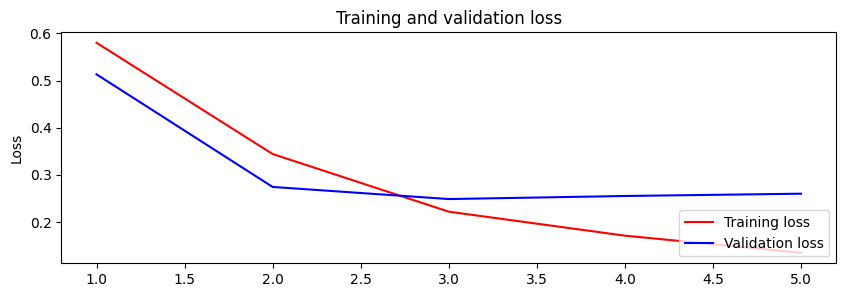

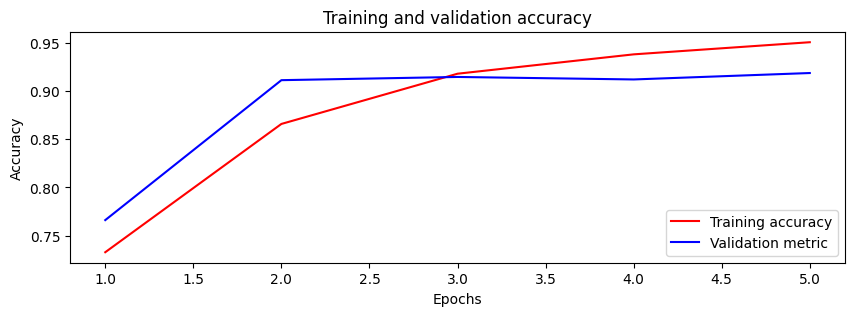

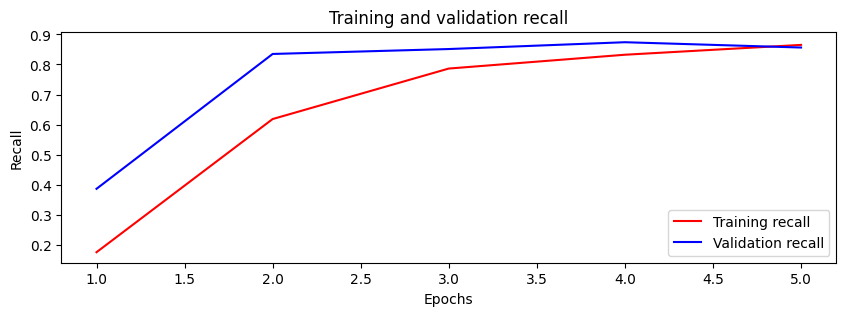

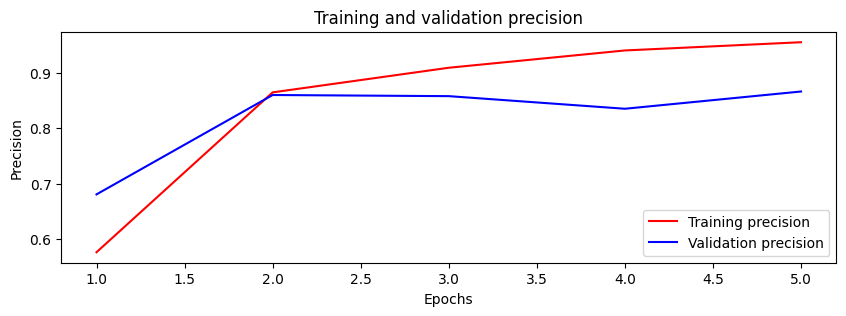

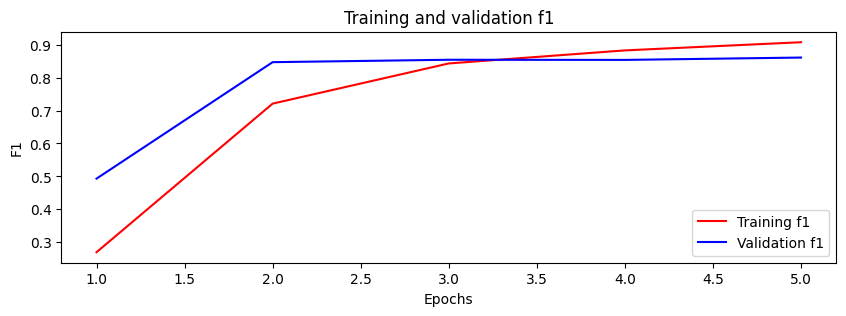

In [ ]:
loss = history_dict['loss']
val_loss = history_dict['val_loss']

accuracy = history_dict['binary_accuracy']
val_accuracy = history_dict['val_binary_accuracy']

recall = history_dict['recall_2']
val_recall = history_dict['val_recall_2']

precision = history_dict['precision_2']
val_precision = history_dict['val_precision_2']

f1 = [2 * i * j / (i + j) for i,j in zip(recall, precision)]
val_f1 = [2 * i * j / (i + j) for i,j in zip(val_recall, val_precision)]

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(10, 3))
fig.tight_layout()
# r is for "solid red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.show()
plt.close()

fig = plt.figure(figsize=(10, 3))
fig.tight_layout()
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation metric')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()
plt.close()

fig = plt.figure(figsize=(10, 3))
fig.tight_layout()
plt.plot(epochs, recall, 'r', label='Training recall')
plt.plot(epochs, val_recall, 'b', label='Validation recall')
plt.title('Training and validation recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend(loc='lower right')
plt.show()
plt.close()

fig = plt.figure(figsize=(10, 3))
fig.tight_layout()
plt.plot(epochs, precision, 'r', label='Training precision')
plt.plot(epochs, val_precision, 'b', label='Validation precision')
plt.title('Training and validation precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend(loc='lower right')
plt.show()
plt.close()

fig = plt.figure(figsize=(10, 3))
fig.tight_layout()
plt.plot(epochs, f1, 'r', label='Training f1')
plt.plot(epochs, val_f1, 'b', label='Validation f1')
plt.title('Training and validation f1')
plt.xlabel('Epochs')
plt.ylabel('F1')
plt.legend(loc='lower right')
plt.show()
plt.close()

In [ ]:
######################################BERT-talking-heads-base#############################################

In [ ]:
#@title Choose a BERT model to fine-tune

bert_model_name = 'talking-heads_base'  #@param ["bert_en_uncased_L-12_H-768_A-12", "bert_en_cased_L-12_H-768_A-12", "bert_multi_cased_L-12_H-768_A-12", "small_bert/bert_en_uncased_L-2_H-128_A-2", "small_bert/bert_en_uncased_L-2_H-256_A-4", "small_bert/bert_en_uncased_L-2_H-512_A-8", "small_bert/bert_en_uncased_L-2_H-768_A-12", "small_bert/bert_en_uncased_L-4_H-128_A-2", "small_bert/bert_en_uncased_L-4_H-256_A-4", "small_bert/bert_en_uncased_L-4_H-512_A-8", "small_bert/bert_en_uncased_L-4_H-768_A-12", "small_bert/bert_en_uncased_L-6_H-128_A-2", "small_bert/bert_en_uncased_L-6_H-256_A-4", "small_bert/bert_en_uncased_L-6_H-512_A-8", "small_bert/bert_en_uncased_L-6_H-768_A-12", "small_bert/bert_en_uncased_L-8_H-128_A-2", "small_bert/bert_en_uncased_L-8_H-256_A-4", "small_bert/bert_en_uncased_L-8_H-512_A-8", "small_bert/bert_en_uncased_L-8_H-768_A-12", "small_bert/bert_en_uncased_L-10_H-128_A-2", "small_bert/bert_en_uncased_L-10_H-256_A-4", "small_bert/bert_en_uncased_L-10_H-512_A-8", "small_bert/bert_en_uncased_L-10_H-768_A-12", "small_bert/bert_en_uncased_L-12_H-128_A-2", "small_bert/bert_en_uncased_L-12_H-256_A-4", "small_bert/bert_en_uncased_L-12_H-512_A-8", "small_bert/bert_en_uncased_L-12_H-768_A-12", "albert_en_base", "electra_small", "electra_base", "experts_pubmed", "experts_wiki_books", "talking-heads_base"]

map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')


BERT model selected           : https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


In [ ]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)

In [ ]:
bert_model = hub.KerasLayer(tfhub_handle_encoder)

In [ ]:
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(1, activation=None, name='classifier')(net)
  return tf.keras.Model(text_input, net)


In [ ]:
classifier_model = build_classifier_model()

In [ ]:
# classifier_model = build_classifier_model()
# bert_raw_result = classifier_model(tf.constant(text_test))
# print(tf.sigmoid(bert_raw_result))

In [ ]:
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)

accuracy = tf.metrics.BinaryAccuracy()
recall = tf.metrics.Recall()
precision = tf.metrics.Precision()
metrics = [accuracy, recall, precision]

In [ ]:
epochs = 5
steps_per_epoch = tf.data.experimental.cardinality(train_ds).numpy()
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [ ]:
classifier_model.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics)

In [ ]:
print(f'Training model with {tfhub_handle_encoder}')
history = classifier_model.fit(x=train_ds,
                               validation_data=val_ds,
                               epochs=epochs)

Training model with https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1
Epoch 1/5
338/338 [==============================] - 476s 1s/step - loss: 0.3763 - binary_accuracy: 0.8465 - recall: 0.5340 - precision: 0.8674 - val_loss: 0.2478 - val_binary_accuracy: 0.9143 - val_recall: 0.8451 - val_precision: 0.8614
Epoch 2/5
338/338 [==============================] - 448s 1s/step - loss: 0.2092 - binary_accuracy: 0.9242 - recall: 0.8120 - precision: 0.9080 - val_loss: 0.2606 - val_binary_accuracy: 0.9169 - val_recall: 0.8615 - val_precision: 0.8571
Epoch 3/5
338/338 [==============================] - 447s 1s/step - loss: 0.1429 - binary_accuracy: 0.9514 - recall: 0.8820 - precision: 0.9408 - val_loss: 0.3057 - val_binary_accuracy: 0.9143 - val_recall: 0.8753 - val_precision: 0.8404
Epoch 4/5
338/338 [==============================] - 447s 1s/step - loss: 0.0859 - binary_accuracy: 0.9713 - recall: 0.9329 - precision: 0.9635 - val_loss: 0.3512 - val_binary_accuracy: 0.9229 - val_recall:

In [ ]:
loss, accuracy, recall, precision = classifier_model.evaluate(test_ds)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1: {2 * recall * precision / (recall + precision)}')

85/85 [==============================] - 38s 448ms/step - loss: 0.3823 - binary_accuracy: 0.9247 - recall: 0.8489 - precision: 0.8904
Loss: 0.38227683305740356
Accuracy: 0.9247311949729919
Recall: 0.8488665223121643
Precision: 0.8903566598892212
F1: 0.869116705931906


In [ ]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'binary_accuracy', 'recall', 'precision', 'val_loss', 'val_binary_accuracy', 'val_recall', 'val_precision'])


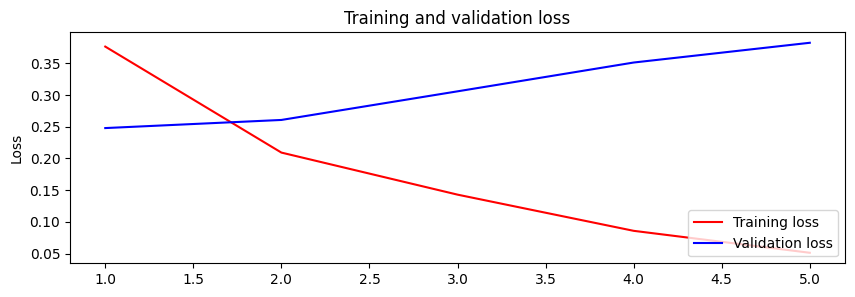

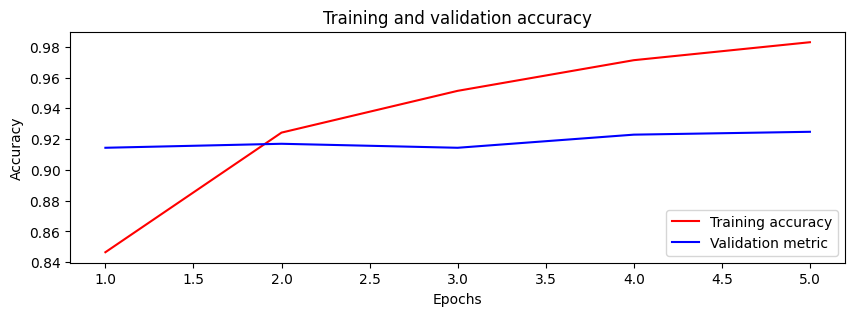

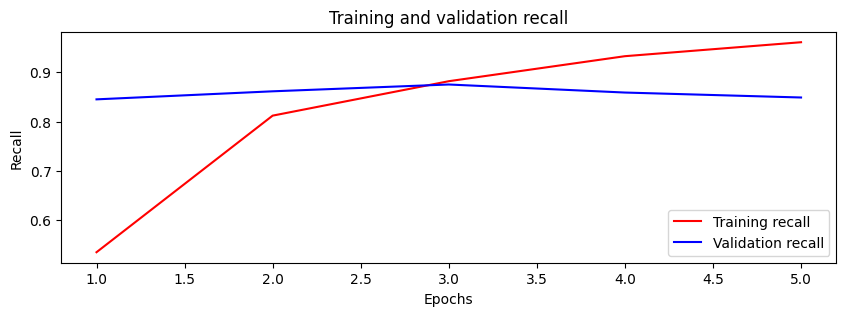

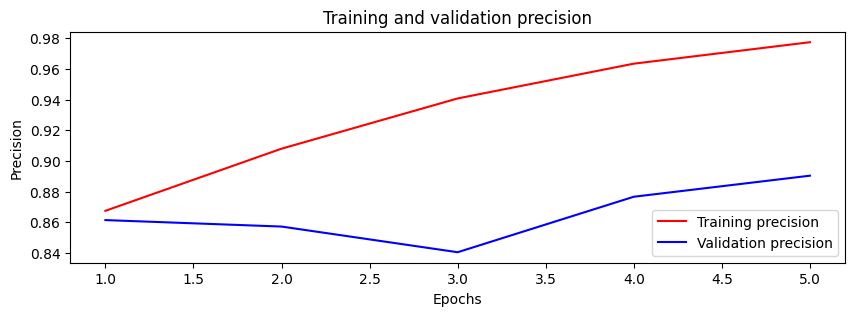

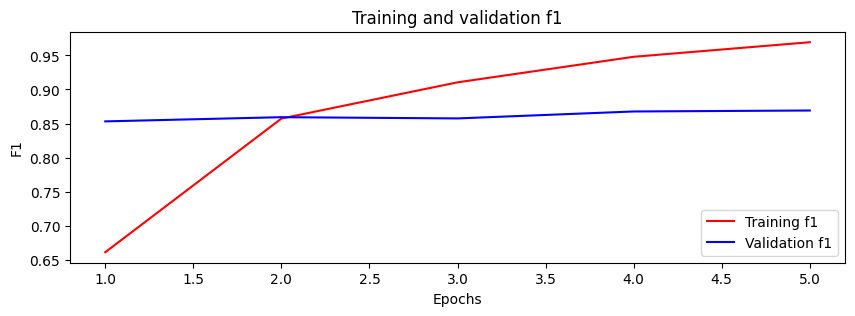

In [ ]:
loss = history_dict['loss']
val_loss = history_dict['val_loss']

accuracy = history_dict['binary_accuracy']
val_accuracy = history_dict['val_binary_accuracy']

recall = history_dict['recall']
val_recall = history_dict['val_recall']

precision = history_dict['precision']
val_precision = history_dict['val_precision']

f1 = [2 * i * j / (i + j) for i,j in zip(recall, precision)]
val_f1 = [2 * i * j / (i + j) for i,j in zip(val_recall, val_precision)]

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(10, 3))
fig.tight_layout()
# r is for "solid red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.show()
plt.close()

fig = plt.figure(figsize=(10, 3))
fig.tight_layout()
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation metric')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()
plt.close()

fig = plt.figure(figsize=(10, 3))
fig.tight_layout()
plt.plot(epochs, recall, 'r', label='Training recall')
plt.plot(epochs, val_recall, 'b', label='Validation recall')
plt.title('Training and validation recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend(loc='lower right')
plt.show()
plt.close()

fig = plt.figure(figsize=(10, 3))
fig.tight_layout()
plt.plot(epochs, precision, 'r', label='Training precision')
plt.plot(epochs, val_precision, 'b', label='Validation precision')
plt.title('Training and validation precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend(loc='lower right')
plt.show()
plt.close()

fig = plt.figure(figsize=(10, 3))
fig.tight_layout()
plt.plot(epochs, f1, 'r', label='Training f1')
plt.plot(epochs, val_f1, 'b', label='Validation f1')
plt.title('Training and validation f1')
plt.xlabel('Epochs')
plt.ylabel('F1')
plt.legend(loc='lower right')
plt.show()
plt.close()

In [ ]:
########Multiclass classification ############################################

In [ ]:
# A dependency of the preprocessing for BERT inputs
!pip install -q -U "tensorflow-text==2.11.*"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 43.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 81.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 72.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 110.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 kB 41.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 96.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 61.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-datasets 4.9.2 requires protobuf>=3.20, but you have protobuf 3.19.6 which is incompatible.
tensorflow-metadata 1.14.0 requires protobuf<4.21,>=3.20.3, but you have protobuf 3

In [ ]:
!pip install -q tf-models-official

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 72.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 98.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 479.7/479.7 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 83.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.6/311.6 kB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 93.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 86.4 MB/s eta 0:00:00


In [ ]:
import os
import shutil

import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', None)

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization  # to create AdamW optimizer

import matplotlib.pyplot as plt

tf.get_logger().setLevel('ERROR')

In [ ]:
df

,Variables,Unnamed: 0.1,Unnamed: 0,Causal-relation ID,Causal-relation text,Role in the text,expertA_level0,expertA_level1,expertB_level2,expertB_level0,...,expertB_level2.1,Label,Label1,Label2,Label_f,performance,Label1_f,Level1,Label2_f,Level2
0,changes in the impact of unobservable inputs on the value of the embedded derivative in relation to the instrument as a whole,1352,1352,BAC_Lijia_67,Transfers occur on a regular basis for long-term debt instruments due to changes in the impact of unobservable inputs on the value of the embedded derivative in relation to the instrument as a whole,cause,NP,NP,NP,NP,...,NP,NP,NP,NP,NP,0,NP,3,NP,11
1,"Any mismatch between the adoption of ARRs in loans, securities and derivatives markets may impact hedging or other financial arrangements we have implemented",1268,1268,BAC_Lijia_25,"Any mismatch between the adoption of ARRs in loans, securities and derivatives markets may impact hedging or other financial arrangements we have implemented , and as a result we may experience unanticipated market exposures .",cause,NP,NP,NP,NP,...,NP,P,INV,NP,P,1,INV,2,NP,11
2,"IBORs, do not reflect bank credit risk",1266,1266,BAC_Lijia_24,"Additionally, most ARRs are calculated on a compounded or weighted-average basis, involve complex billing and reconciliation and, unlike IBORs, do not reflect bank credit risk and therefore may require a spread adjustment .",cause,NP,NP,NP,NP,...,NP,NP,NP,NP,NP,0,NP,3,NP,11
3,The insolvency and resolution process,1225,1225,BAC_Lijia_3,"The insolvency and resolution process could also lead to a large reduction or total elimination of the value of a BHCs outstanding equity, as well as impairment or elimination of certain debt",cause,NP,NP,NP,NP,...,NP,NP,NP,NP,NP,0,NP,3,NP,11
4,abnormal market movements,1300,1300,BAC_Lijia_41,This analysis estimates the change in the value of our trading portfolio that may result from abnormal market movements .,cause,NP,NP,NP,NP,...,NP,NP,NP,NP,NP,0,NP,3,NP,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13484,your employment with the Firm terminates,4732,4732,JPM_Golnaz_Alice_374,"your employment with the Firm terminates because (i) you are unable to return to work while you are receiving benefits under the JPMorgan Chase Long Term Disability Plan, or for non-U.S. employees, under the equivalent JPMorgan Chase-sponsored local country plan (in either case, LTD Plan),",outcome,P,NP,NP,P,...,NP,P,NP,NP,P,1,NP,3,NP,11
13485,your separation from service,4665,4665,JPM_Golnaz_Alice_335,"Notwithstanding anything herein to the contrary, if you (i) are subject to taxation under the Code, (ii) are a specified employee as defined in the JPMorgan Chase 2005 Deferred Compensation Plan and (iii) have incurred a separation from service (as defined in that Plan with the exception of death) and if any units/shares under this award represent deferred compensation as defined in Section 409A and such shares are distributable (under the terms of this award) within six months following, and as a result of your separation from service, then those shares will be delivered to you during the first calendar month after the expiration of six full months from date of your separation from service.",cause,NP,NP,NP,NP,...,NP,NP,NP,NP,NP,0,NP,3,NP,11
13486,"your separation from service, then those shares will be delivered during the first calendar month after the expiration of six full months from date of your separation from service.",4715,4715,JPM_Golnaz_Alice_363,"Notwithstanding anything herein to the contrary, if you (i) are subject to taxation under the Code, (ii) are a specified employee as defined in the JPMorgan Chase 2005 Deferred Compensation Plan and (iii) have incurred a separation from service (as defined in that Plan with the exception of death) and if any units/shares under this award represent deferred compensation as defined in Section 409A and such shares are distributable (under the terms of this award) within s

In [ ]:
# import pandas as pd
# import numpy as np
# import tensorflow as tf
# from tensorflow import keras
# import tensorflow_hub as hub
# from tensorflow.keras import layers
# import tensorflow_decision_forests as tfdf
# import matplotlib.pyplot as plt

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('training_data.csv')

In [ ]:
df

,Unnamed: 0.1,Unnamed: 0,Causal-relation ID,Causal-relation text,Variables,Role in the text,expertA_level0,expertA_level1,expertB_level2,expertB_level0,...,expertB_level2.1,Label,Label1,Label2,Label_f,performance,Label1_f,Level1,Label2_f,Level2
0,0,0,AFLAC_Wyatt_1,"When a policyholder or insured gets sick or hurt, the Company pays cash benefits fairly and promptly for eligible claims",cash benefits fairly and promptly for eligible claims,outcome,P,CUS,CUS4,P,...,CUS4,P,CUS,CUS4,P,1,CUS,0,CUS4,3
1,1,1,AFLAC_Wyatt_1,"When a policyholder or insured gets sick or hurt, the Company pays cash benefits fairly and promptly for eligible claims",policyholder or insured gets sick or hurt,cause,NP,NP,NP,NP,...,NP,P,CUS,NP,P,1,CUS,0,NP,11
2,2,2,AFLAC_Wyatt_2,"During 2020, in response to the onset and development of the global COVID-19 pandemic, , the Company pivoted to digital sales methods and accelerated related digital investments .",to digital sales methods,outcome,NP,NP,NP,NP,...,NP,P,INV,NP,P,1,INV,2,NP,11
3,3,3,AFLAC_Wyatt_2,"During 2020, in response to the onset and development of the global COVID-19 pandemic, , the Company pivoted to digital sales methods and accelerated related digital investments .",related digital investments,outcome,NP,NP,NP,NP,...,NP,P,INV,NP,P,1,INV,2,NP,11
4,4,4,AFLAC_Wyatt_2,"During 2020, in response to the onset and development of the global COVID-19 pandemic, , the Company pivoted to digital sales methods and accelerated related digital investments .","the onset and development of the global COVID-19 pandemic,",cause,NP,NP,NP,NP,...,NP,NP,NP,NP,NP,0,NP,3,NP,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14503,14503,14503,ZION_Golnaz_Alice_151,"We reduced share-based compensation expense by $1 million during 2019, 2018, and 2017, respectively, as a result of using a valuation model to estimate a liquidity discount on RSUs with post-vesting restrictions.",using a valuation model to estimate a liquidity discount on RSUs with post-vesting restrictions.,cause,NP,NP,NP,NP,...,NP,NP,NP,NP,NP,0,NP,3,NP,11
14504,14504,14504,ZION_Golnaz_Alice_151,"During 2018 after filing its 2017 federal and state tax returns, the Bank finalized its analysis of all net DTAs that existed at December 31, 2017 and made a $(2) million tax benefit adjustment on net DTAs as a result of the Act.","Bank finalized its analysis of all net DTAs that existed at December 31, 2017 and made a $(2) million tax benefit adjustment on net DTAs",outcome,P,UC,UC,P,...,UC,P,UC,UC,P,1,UC,5,UC,15
14505,14505,14505,ZION_Golnaz_Alice_151,"During 2018 after filing its 2017 federal and state tax returns, the Bank finalized its analysis of all net DTAs that existed at December 31, 2017 and made a $(2) million tax benefit adjustment on net DTAs as a result of the Act.",the Act.,cause,NP,NP,NP,NP,...,NP,NP,NP,NP,NP,0,NP,3,NP,11
14506,14506,14506,ZION_Golnaz_Alice_151,"The following schedule does not present total assets or income tax expense for each operating segment, but instead presents average loans, average deposits and income before income taxes because these are the metrics that management uses when evaluating performance and making decisions pertaining to the operating segments.","presents average loans, average deposits and income before income taxes",outcome,P,INV,INV1,P,...,INV1,P,INV,INV1,P,1,INV,2,INV1,7


In [ ]:
df_shuffled = df

In [ ]:
import keras
y = keras.utils.to_categorical(df['Level1'], num_classes=6)

In [ ]:
y

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.]], dtype=float32)

In [ ]:
from sklearn.model_selection import train_test_split
# split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(df['Variables'],y , test_size=0.2, random_state=1)

In [ ]:
# test_df = df_shuffled.sample(frac=0.2, random_state=42)
# train_df = df_shuffled.drop(test_df.index)
# print(f"Using {len(train_df)} samples for training and {len(test_df)} for validation")

In [ ]:
train_text = pd.DataFrame(X_train)

In [ ]:
train_lab = pd.DataFrame(y_train)

In [ ]:
train = pd.concat([train_text,train_lab],axis=1)

In [ ]:
train

,Variables,0,1,2,3,4,5
9468,experience operational disruptions if our employees are unable or unwilling to come to work,1.0,0.0,0.0,0.0,0.0,0.0
2481,gain recorded in the fourth quarter of 2019 on the sale of Comerica's Health Savings Account,0.0,0.0,1.0,0.0,0.0,0.0
8259,Changes in the balances of such liabilities,0.0,0.0,0.0,1.0,0.0,0.0
7657,the Companys compilation of that information for use in its business,0.0,0.0,0.0,1.0,0.0,0.0
3579,"Company may not be able to achieve all the revenue increases, expense reductions and other synergies that it expects to",0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
11578,NaN,0.0,0.0,0.0,1.0,0.0,0.0
11583,NaN,0.0,0.0,0.0,1.0,0.0,0.0
11588,NaN,0.0,0.0,0.0,1.0,0.0,0.0
11591,NaN,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
#!pip install np_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56438 sha256=e238f069b99da2eff692dd150ba2a249a0233dd5722550a826836c9be73992d0
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


In [ ]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
#from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import to_categorical
#from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [ ]:
# encoder = LabelEncoder()
# encoder.fit(train['Level1'])
# encoded_Y = encoder.transform(train['Level1'])
# # convert integers to dummy variables (i.e. one hot encoded)
# dummy_y = tf.keras.utils.to_categorical(encoded_Y)

In [ ]:
# dummy_y

array([[0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.]], dtype=float32)

In [ ]:
# dummy_y.shape

(11606, 6)

In [ ]:
# print(np.shape(list(dummy_y)))

(11606, 6)


In [ ]:
# enco = pd.Series(list(dummy_y))

In [ ]:
# train['enco'] = enco

In [ ]:
# train

In [ ]:
test_text = pd.DataFrame(X_test)
test_label = pd.DataFrame(y_test)

In [ ]:
test = pd.concat([test_text,test_label],axis=1)

In [ ]:
# test_encoder = LabelEncoder()
# test_encoder.fit(test['Level1'])
# encoded_test = test_encoder.transform(test['Level1'])
# # convert integers to dummy variables (i.e. one hot encoded)
# dummy_test = tf.keras.utils.to_categorical(encoded_test)

In [ ]:
# dummy_test

array([[0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
# rows = [{'Index': i} for i in enumerate(dummy_test)]

In [ ]:
# np.shape(rows)

(2902,)

In [ ]:
# test_ro = pd.DataFrame(rows)

In [ ]:
# test_ro

,Index
0,"(0, [0.0, 0.0, 0.0, 0.0, 0.0, 1.0])"
1,"(1, [0.0, 0.0, 0.0, 1.0, 0.0, 0.0])"
2,"(2, [0.0, 0.0, 1.0, 0.0, 0.0, 0.0])"
3,"(3, [0.0, 0.0, 0.0, 1.0, 0.0, 0.0])"
4,"(4, [0.0, 0.0, 1.0, 0.0, 0.0, 0.0])"
...,...
2897,"(2897, [0.0, 0.0, 1.0, 0.0, 0.0, 0.0])"
2898,"(2898, [0.0, 0.0, 1.0, 0.0, 0.0, 0.0])"
2899,"(2899, [0.0, 0.0, 0.0, 1.0, 0.0, 0.0])"
2900,"(2900, [0.0, 0.0, 0.0, 0.0, 1.0, 0.0])"


In [ ]:
# test = pd.concat()

,Variables,Level1,enco
11531,Foreign exchange trading services decreased 7% in 2019 compared to 2018 primarily,5,NaN
4675,continuously employed by the Firm,3,NaN
8552,provide investors with a useful representation of our businesses ongoing activity in each period.,2,NaN
2661,operational failure,3,"(2661, [0.0, 0.0, 0.0, 1.0, 0.0, 0.0])"
10556,our actual results and financial condition to differ from the expectations stated in the forward-looking statements,2,NaN
...,...,...,...
8928,"Foreign exchange trading income of $232.2 million in 2019, decreased",2,NaN
703,"In fourth quarter 2020, we recognized a net pretax non-cash loss on sale of approximately $12.0 million",2,"(703, [0.0, 0.0, 1.0, 0.0, 0.0, 0.0])"
12215,claims made that the Company did not satisfy its obligations,3,NaN
582,an increase in anticipated default factors following the recent economic impact related to COVID-19,4,"(582, [0.0, 0.0, 0.0, 1.0, 0.0, 0.0])"


In [ ]:
# test_arr = list(dummy_test)

In [ ]:
# test['encod'] = pd.Series(test_arr)

In [ ]:
# test

,Variables,Level1,encod
11531,Foreign exchange trading services decreased 7% in 2019 compared to 2018 primarily,5,NaN
4675,continuously employed by the Firm,3,NaN
8552,provide investors with a useful representation of our businesses ongoing activity in each period.,2,NaN
2661,operational failure,3,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0]"
10556,our actual results and financial condition to differ from the expectations stated in the forward-looking statements,2,NaN
...,...,...,...
8928,"Foreign exchange trading income of $232.2 million in 2019, decreased",2,NaN
703,"In fourth quarter 2020, we recognized a net pretax non-cash loss on sale of approximately $12.0 million",2,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0]"
12215,claims made that the Company did not satisfy its obligations,3,NaN
582,an increase in anticipated default factors following the recent economic impact related to COVID-19,4,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0]"


In [ ]:
#train_df

In [ ]:
def create_dataset(dataframe):
    dataset = tf.data.Dataset.from_tensor_slices(
        (dataframe["Variables"].to_numpy(), dataframe["Level1"].to_numpy())
    )
    dataset = dataset.batch(32)
    dataset = dataset.prefetch(tf.data.AUTOTUNE)
    return dataset


train_ds = create_dataset(train)
test_ds = create_dataset(test)

In [ ]:
# sentence_encoder_layer = hub.KerasLayer(
#     "https://tfhub.dev/google/universal-sentence-encoder/4"
# )

In [ ]:
# df = pd.read_csv('training_data.csv')
# df = df.groupby('Variables').max().reset_index()

# print('10 random samples:')
# display(df.sample(10))

# #stakeholder = 'CUS'
# df['label'] = df['Level1']
# df = df[['Variables', 'label']].groupby('Variables').max().reset_index()

# print('labels:')
# print(df['label'].value_counts())

In [ ]:
#df

In [ ]:
# !mkdir knowledge_data1
# !mkdir knowledge_data1/cus
# !mkdir knowledge_data1/inv
# !mkdir knowledge_data1/np
# !mkdir knowledge_data1/uc
# !mkdir knowledge_data1/emp
# !mkdir knowledge_data1/soc

In [ ]:
# for i in df[df['label']==0].index:
#   txt = df.iloc[i]['Variables']
#   text_file = open(f"knowledge_data1/cus/{i}.txt", "wt")
#   text_file.write(txt)
#   text_file.close()
# for i in df[df['label']==1].index:
#   txt = df.iloc[i]['Variables']
#   text_file = open(f"knowledge_data1/emp/{i}.txt", "wt")
#   text_file.write(txt)
#   text_file.close()
# for i in df[df['label']==2].index:
#   txt = df.iloc[i]['Variables']
#   text_file = open(f"knowledge_data1/inv/{i}.txt", "wt")
#   text_file.write(txt)
#   text_file.close()
# for i in df[df['label']==3].index:
#   txt = df.iloc[i]['Variables']
#   text_file = open(f"knowledge_data1/np/{i}.txt", "wt")
#   text_file.write(txt)
#   text_file.close()
# for i in df[df['label']==4].index:
#   txt = df.iloc[i]['Variables']
#   text_file = open(f"knowledge_data1/soc/{i}.txt", "wt")
#   text_file.write(txt)
#   text_file.close()
# for i in df[df['label']==5].index:
#   txt = df.iloc[i]['Variables']
#   text_file = open(f"knowledge_data1/uc/{i}.txt", "wt")
#   text_file.write(txt)
#   text_file.close()

In [ ]:
# txt = df
# text_file = open(f"knowledge_data1/text.txt", "wt")
# text_file.write(str(txt))

In [ ]:
# print(str(txt))

In [ ]:
# AUTOTUNE = tf.data.AUTOTUNE
# batch_size = 32
# seed = 42

# raw_train_ds = tf.keras.utils.text_dataset_from_directory(
#     'knowledge_data1',
#     batch_size=batch_size,
#     validation_split=0.2,
#     subset='training',
#     seed=seed)

# class_names = raw_train_ds.class_names
# train_ds = raw_train_ds.cache().prefetch(buffer_size=AUTOTUNE)

# val_ds = tf.keras.utils.text_dataset_from_directory(
#     'knowledge_data1',
#     batch_size=batch_size,
#     validation_split=0.2,
#     subset='validation',
#     seed=seed)

# val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# test_ds = val_ds

In [ ]:
#@title Choose a BERT model to fine-tune

bert_model_name = 'albert_en_base'  #@param ["bert_en_uncased_L-12_H-768_A-12", "bert_en_cased_L-12_H-768_A-12", "bert_multi_cased_L-12_H-768_A-12", "small_bert/bert_en_uncased_L-2_H-128_A-2", "small_bert/bert_en_uncased_L-2_H-256_A-4", "small_bert/bert_en_uncased_L-2_H-512_A-8", "small_bert/bert_en_uncased_L-2_H-768_A-12", "small_bert/bert_en_uncased_L-4_H-128_A-2", "small_bert/bert_en_uncased_L-4_H-256_A-4", "small_bert/bert_en_uncased_L-4_H-512_A-8", "small_bert/bert_en_uncased_L-4_H-768_A-12", "small_bert/bert_en_uncased_L-6_H-128_A-2", "small_bert/bert_en_uncased_L-6_H-256_A-4", "small_bert/bert_en_uncased_L-6_H-512_A-8", "small_bert/bert_en_uncased_L-6_H-768_A-12", "small_bert/bert_en_uncased_L-8_H-128_A-2", "small_bert/bert_en_uncased_L-8_H-256_A-4", "small_bert/bert_en_uncased_L-8_H-512_A-8", "small_bert/bert_en_uncased_L-8_H-768_A-12", "small_bert/bert_en_uncased_L-10_H-128_A-2", "small_bert/bert_en_uncased_L-10_H-256_A-4", "small_bert/bert_en_uncased_L-10_H-512_A-8", "small_bert/bert_en_uncased_L-10_H-768_A-12", "small_bert/bert_en_uncased_L-12_H-128_A-2", "small_bert/bert_en_uncased_L-12_H-256_A-4", "small_bert/bert_en_uncased_L-12_H-512_A-8", "small_bert/bert_en_uncased_L-12_H-768_A-12", "albert_en_base", "electra_small", "electra_base", "experts_pubmed", "experts_wiki_books", "talking-heads_base"]

map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')


BERT model selected           : https://tfhub.dev/tensorflow/albert_en_base/2
Preprocess model auto-selected: https://tfhub.dev/tensorflow/albert_en_preprocess/3


In [ ]:
# from sklearn.preprocessing import OneHotEncoder
# from numpy import argmax
# # integer encode
# label_encoder = LabelEncoder()
# integer_encoded = label_encoder.fit_transform(df['Variables'])
# print(integer_encoded)
# # binary encode
# onehot_encoder = OneHotEncoder(sparse=False)
# integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
# onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
# print(onehot_encoded)
# # invert first example
# inverted = label_encoder.inverse_transform([argmax(onehot_encoded[1, :])])

In [ ]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)

In [ ]:
bert_model = hub.KerasLayer(tfhub_handle_encoder)

In [ ]:
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(6, activation='sigmoid', name='classifier')(net)
  return tf.keras.Model(text_input, net)

In [ ]:
classifier_model = build_classifier_model()

In [ ]:
classifier_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text (InputLayer)           [(None,)]                    0         []                            
                                                                                                  
 preprocessing (KerasLayer)  {'input_type_ids': (None,    0         ['text[0][0]']                
                             128),                                                                
                              'input_mask': (None, 128)                                           
                             , 'input_word_ids': (None,                                           
                              128)}                                                               
                                                                                            

In [ ]:
loss = tf.keras.losses.CategoricalCrossentropy() #SparseCategoricalCrossentropy from_logits=True

accuracy = tf.metrics.CategoricalAccuracy()
recall = tf.metrics.Recall()
precision = tf.metrics.Precision()
metrics = [accuracy, recall, precision]

In [ ]:
epochs = 5
# steps_per_epoch = tf.data.experimental.cardinality(X_train).numpy()
# num_train_steps = steps_per_epoch * epochs
# num_warmup_steps = int(0.1*num_train_steps)

# init_lr = 0.01
# optimizer = optimization.create_optimizer(init_lr=init_lr,
#                                           num_train_steps=num_train_steps,
#                                           num_warmup_steps=num_warmup_steps,
#                                           optimizer_type='adamw')

In [ ]:
classifier_model.compile(loss=loss,metrics=metrics) #optimizer=optimizer,
#classifier_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# val_ds = test_ds

In [ ]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
history = classifier_model.fit(X_train,y_train,epochs=epochs)

Epoch 1/5
363/363 [==============================] - 395s 1s/step - loss: 1.0213 - categorical_accuracy: 0.6778 - recall_6: 0.9898 - precision_6: 0.2063
Epoch 2/5
363/363 [==============================] - 387s 1s/step - loss: 1.0070 - categorical_accuracy: 0.6814 - recall_6: 0.9987 - precision_6: 0.1851
Epoch 3/5
363/363 [==============================] - 387s 1s/step - loss: 0.9974 - categorical_accuracy: 0.6875 - recall_6: 0.9995 - precision_6: 0.1722
Epoch 4/5
363/363 [==============================] - 387s 1s/step - loss: 0.9942 - categorical_accuracy: 0.6871 - recall_6: 0.9997 - precision_6: 0.1713
Epoch 5/5
363/363 [==============================] - 387s 1s/step - loss: 0.9883 - categorical_accuracy: 0.6880 - recall_6: 0.9999 - precision_6: 0.1668


In [ ]:
# print(f'Training model with {tfhub_handle_encoder}')
# history = classifier_model.fit(x=train_ds,
#                                validation_data=val_ds,
#                                epochs=epochs)

In [ ]:
# print(f'Training model with {tfhub_handle_encoder}')
# history = classifier_model.fit(x=train_ds,
#                                validation_data=val_ds,
#                                epochs=epochs)

In [ ]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
#print(classifier_model.predict(test_ds))

In [ ]:
loss, accuracy, recall, precision = classifier_model.evaluate(X_test,y_test)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1: {2 * recall * precision / (recall + precision)}')

91/91 [==============================] - 29s 308ms/step - loss: 1.0071 - categorical_accuracy: 0.7316 - recall_6: 1.0000 - precision_6: 0.1667
Loss: 1.0070773363113403
Accuracy: 0.731564462184906
Recall: 1.0
Precision: 0.1666666716337204
F1: 0.2857142930128136


In [ ]:
# loss, accuracy, recall, precision = classifier_model.evaluate(test_ds)

# print(f'Loss: {loss}')
# print(f'Accuracy: {accuracy}')
# print(f'Recall: {recall}')
# print(f'Precision: {precision}')
# print(f'F1: {2 * recall * precision / (recall + precision)}')

In [ ]:
loss, accuracy, recall, precision = classifier_model.evaluate(test_ds)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1: {2 * recall * precision / (recall + precision)}')

91/91 [==============================] - 33s 361ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - recall: 1.0000 - precision: 0.9628
Loss: 0.0
Accuracy: 1.0
Recall: 1.0
Precision: 0.9627842903137207
F1: 0.9810393277193333


In [ ]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'categorical_accuracy', 'recall', 'precision', 'val_loss', 'val_categorical_accuracy', 'val_recall', 'val_precision'])


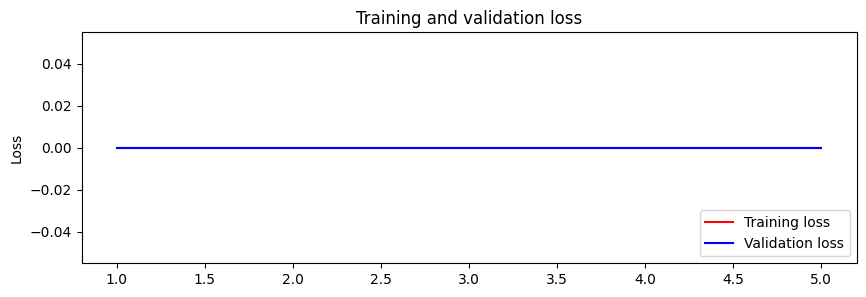

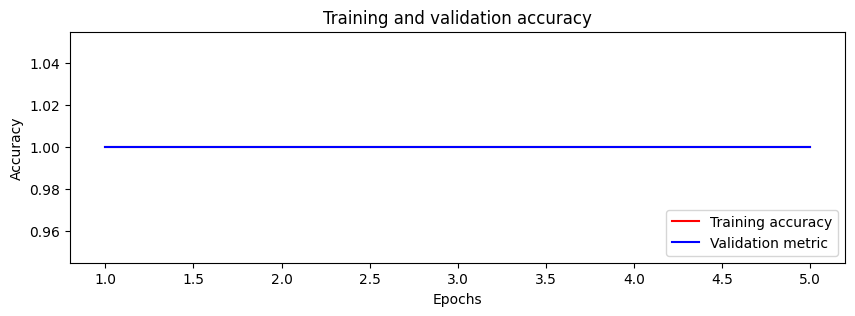

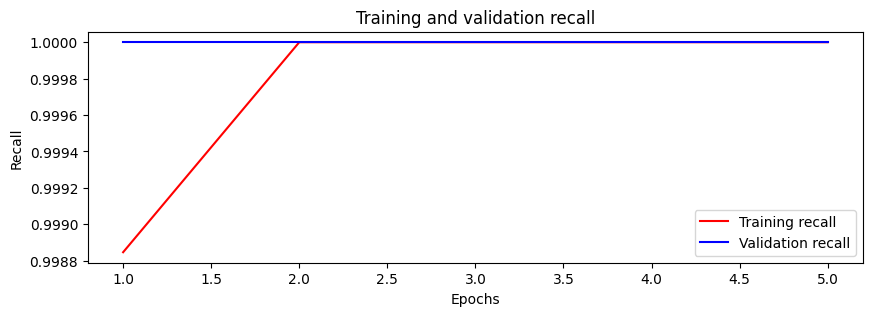

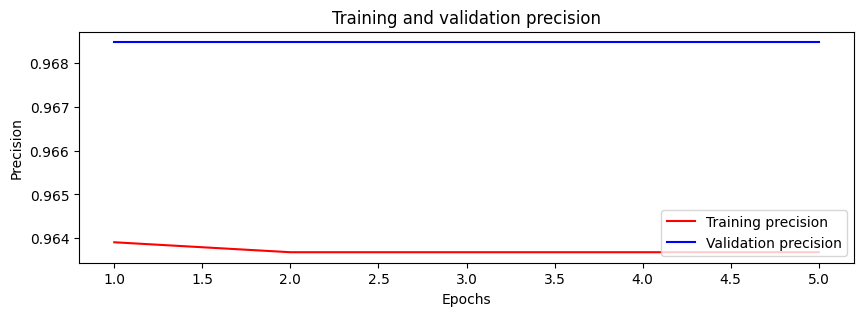

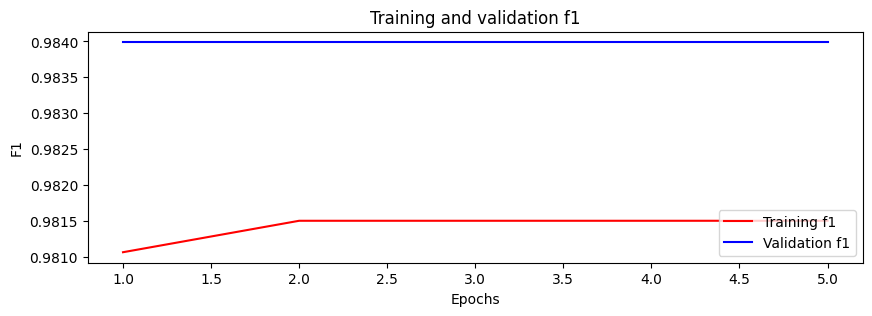

In [ ]:
loss = history_dict['loss']
val_loss = history_dict['val_loss']

accuracy = history_dict['categorical_accuracy']
val_accuracy = history_dict['val_categorical_accuracy']

recall = history_dict['recall']
val_recall = history_dict['val_recall']

precision = history_dict['precision']
val_precision = history_dict['val_precision']

f1 = [2 * i * j / (i + j) for i,j in zip(recall, precision)]
val_f1 = [2 * i * j / (i + j) for i,j in zip(val_recall, val_precision)]

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(10, 3))
fig.tight_layout()
# r is for "solid red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.show()
plt.close()

fig = plt.figure(figsize=(10, 3))
fig.tight_layout()
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation metric')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()
plt.close()

fig = plt.figure(figsize=(10, 3))
fig.tight_layout()
plt.plot(epochs, recall, 'r', label='Training recall')
plt.plot(epochs, val_recall, 'b', label='Validation recall')
plt.title('Training and validation recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend(loc='lower right')
plt.show()
plt.close()

fig = plt.figure(figsize=(10, 3))
fig.tight_layout()
plt.plot(epochs, precision, 'r', label='Training precision')
plt.plot(epochs, val_precision, 'b', label='Validation precision')
plt.title('Training and validation precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend(loc='lower right')
plt.show()
plt.close()

fig = plt.figure(figsize=(10, 3))
fig.tight_layout()
plt.plot(epochs, f1, 'r', label='Training f1')
plt.plot(epochs, val_f1, 'b', label='Validation f1')
plt.title('Training and validation f1')
plt.xlabel('Epochs')
plt.ylabel('F1')
plt.legend(loc='lower right')
plt.show()
plt.close()

In [ ]:
#####################################################

In [ ]:
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf

from sklearn.model_selection import train_test_split
from ast import literal_eval

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('training_data.csv')

In [ ]:
df

,Unnamed: 0.1,Unnamed: 0,Causal-relation ID,Causal-relation text,Variables,Role in the text,expertA_level0,expertA_level1,expertB_level2,expertB_level0,...,expertB_level2.1,Label,Label1,Label2,Label_f,performance,Label1_f,Level1,Label2_f,Level2
0,0,0,AFLAC_Wyatt_1,"When a policyholder or insured gets sick or hurt, the Company pays cash benefits fairly and promptly for eligible claims",cash benefits fairly and promptly for eligible claims,outcome,P,CUS,CUS4,P,...,CUS4,P,CUS,CUS4,P,1,CUS,0,CUS4,3
1,1,1,AFLAC_Wyatt_1,"When a policyholder or insured gets sick or hurt, the Company pays cash benefits fairly and promptly for eligible claims",policyholder or insured gets sick or hurt,cause,NP,NP,NP,NP,...,NP,P,CUS,NP,P,1,CUS,0,NP,11
2,2,2,AFLAC_Wyatt_2,"During 2020, in response to the onset and development of the global COVID-19 pandemic, , the Company pivoted to digital sales methods and accelerated related digital investments .",to digital sales methods,outcome,NP,NP,NP,NP,...,NP,P,INV,NP,P,1,INV,2,NP,11
3,3,3,AFLAC_Wyatt_2,"During 2020, in response to the onset and development of the global COVID-19 pandemic, , the Company pivoted to digital sales methods and accelerated related digital investments .",related digital investments,outcome,NP,NP,NP,NP,...,NP,P,INV,NP,P,1,INV,2,NP,11
4,4,4,AFLAC_Wyatt_2,"During 2020, in response to the onset and development of the global COVID-19 pandemic, , the Company pivoted to digital sales methods and accelerated related digital investments .","the onset and development of the global COVID-19 pandemic,",cause,NP,NP,NP,NP,...,NP,NP,NP,NP,NP,0,NP,3,NP,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14503,14503,14503,ZION_Golnaz_Alice_151,"We reduced share-based compensation expense by $1 million during 2019, 2018, and 2017, respectively, as a result of using a valuation model to estimate a liquidity discount on RSUs with post-vesting restrictions.",using a valuation model to estimate a liquidity discount on RSUs with post-vesting restrictions.,cause,NP,NP,NP,NP,...,NP,NP,NP,NP,NP,0,NP,3,NP,11
14504,14504,14504,ZION_Golnaz_Alice_151,"During 2018 after filing its 2017 federal and state tax returns, the Bank finalized its analysis of all net DTAs that existed at December 31, 2017 and made a $(2) million tax benefit adjustment on net DTAs as a result of the Act.","Bank finalized its analysis of all net DTAs that existed at December 31, 2017 and made a $(2) million tax benefit adjustment on net DTAs",outcome,P,UC,UC,P,...,UC,P,UC,UC,P,1,UC,5,UC,15
14505,14505,14505,ZION_Golnaz_Alice_151,"During 2018 after filing its 2017 federal and state tax returns, the Bank finalized its analysis of all net DTAs that existed at December 31, 2017 and made a $(2) million tax benefit adjustment on net DTAs as a result of the Act.",the Act.,cause,NP,NP,NP,NP,...,NP,NP,NP,NP,NP,0,NP,3,NP,11
14506,14506,14506,ZION_Golnaz_Alice_151,"The following schedule does not present total assets or income tax expense for each operating segment, but instead presents average loans, average deposits and income before income taxes because these are the metrics that management uses when evaluating performance and making decisions pertaining to the operating segments.","presents average loans, average deposits and income before income taxes",outcome,P,INV,INV1,P,...,INV1,P,INV,INV1,P,1,INV,2,INV1,7


In [ ]:
df = df[['Variables','Label1']]

In [ ]:
test_split = 0.2

# Initial train and test split.
train_df, test_df = train_test_split(
    df,
    test_size=test_split,
    stratify=df["Label1"].values,
)

# Splitting the test set further into validation
# and new test sets.
val_df = test_df.sample(frac=0.5)
test_df.drop(val_df.index, inplace=True)

print(f"Number of rows in training set: {len(train_df)}")
print(f"Number of rows in validation set: {len(val_df)}")
print(f"Number of rows in test set: {len(test_df)}")

Number of rows in training set: 11606
Number of rows in validation set: 1451
Number of rows in test set: 1451


In [ ]:
terms = tf.ragged.constant(train_df["Label1"].values)
lookup = tf.keras.layers.StringLookup(output_mode="multi_hot")
lookup.adapt(terms)
vocab = lookup.get_vocabulary()


def invert_multi_hot(encoded_labels):
    """Reverse a single multi-hot encoded label to a tuple of vocab terms."""
    hot_indices = np.argwhere(encoded_labels == 1.0)[..., 0]
    return np.take(vocab, hot_indices)


print("Vocabulary:\n")
print(vocab)

Vocabulary:

['[UNK]', 'NP', 'INV', 'UC', 'CUS', 'EMP', 'SOC']


In [ ]:
sample_label = train_df["Label1"].iloc[0]
print(f"Original label: {sample_label}")

label_binarized = lookup([sample_label])
print(f"Label-binarized representation: {label_binarized}")

Original label: UC
Label-binarized representation: [0. 0. 0. 1. 0. 0. 0.]


In [ ]:
max_seqlen = 150
batch_size = 128
padding_token = "<pad>"
auto = tf.data.AUTOTUNE


def make_dataset(dataframe, is_train=True):
    labels = tf.ragged.constant(dataframe["Label1"].values)
    print(labels)
    label_binarized = lookup(labels).numpy()
    print(label_binarized)
    dataset = tf.data.Dataset.from_tensor_slices(
        (dataframe["Variables"].values, label_binarized)
    )
    dataset = dataset.shuffle(batch_size * 10) if is_train else dataset
    return dataset.batch(batch_size)

In [ ]:
train_df

,Variables,Label1
13138,The amortization of deferred acquisition costs increased,UC
1042,"the debt holders and depositors in non-U.S. offices would be treated differently from, and could receive substantially less, if anything, than the depositors in the U.S. offices of AENB",NP
12903,directors shall be elected by a plurality of the votes present and entitled to vote if the number of director nominees exceeds the number of directors to be elected.,NP
614,"Of our nearly 1,000 office locations, nearly 400 are open, but most of those at reduced capacity",NP
8002,Increases in collateral margin calls on secured financing,NP
...,...,...
2178,the person-to-person approach,NP
3884,increases in AUM of $10.3 billion,INV
4808,number and risk of these investigations and proceedings has increased,NP
10571,the credit profile of our loan portfolio,NP


In [ ]:
train_dataset = make_dataset(train_df, is_train=True)
validation_dataset = make_dataset(val_df, is_train=False)
test_dataset = make_dataset(test_df, is_train=False)

tf.Tensor([b'UC' b'NP' b'NP' ... b'NP' b'NP' b'NP'], shape=(11606,), dtype=string)
[0. 1. 1. 1. 1. 1. 1.]


ValueError: ignored

In [ ]:
############################### rule based###################################

In [ ]:

import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
import numpy as np
import random


In [ ]:
df = pd.read_csv('training_data.csv')
df.columns


Index(['Unnamed: 0.1', 'Unnamed: 0', 'Causal-relation ID',
       'Causal-relation text', 'Variables', 'Role in the text',
       'expertA_level0', 'expertA_level1', 'expertB_level2', 'expertB_level0',
       'expertB_level1', 'expertB_level2.1', 'Label', 'Label1', 'Label2',
       'Label_f', 'performance', 'Label1_f', 'Level1', 'Label2_f', 'Level2'],
      dtype='object')

In [ ]:
df['Label1']

0        CUS
1        CUS
2        INV
3        INV
4         NP
        ... 
14503     NP
14504     UC
14505     NP
14506    INV
14507     NP
Name: Label1, Length: 14508, dtype: object

In [ ]:
df = df[[ 'Variables','Label1', 'Level1']]

In [ ]:
df['Level1'].value_counts()

3    10485
2     2647
5      543
0      491
1      303
4       39
Name: Level1, dtype: int64

In [ ]:
kw_cus = ['customer', 'client', 'consumer', 'user', 'policyholder', 'beneficiar']
kw_inv = ['investor', 'financ', 'shareholder', 'stockholder', 'owners', 'investment', 'credit rating', 'return on', 'interest rate', 'net income', 'profit', 'sales', 'revenue', 'earnings']
kw_emp = ['employee', 'worker', 'staff', 'manager']
kw_soc = ['society', 'societal', 'social responsib', 'social performance', 'communit', 'energy environment', 'natural environment', 'ecolog', 'water', 'waste', ' pollu', 'emission', ' gas']

kw_cus_ = ['customer', 'client', 'consumer']
kw_inv_ = ['investor', 'financ', 'shareholder', 'stockholder', 'owners', 'investment', 'return on', 'net income', 'profit', 'revenue', 'earnings']
kw_emp_ = ['employee', 'worker', 'manager']
kw_soc_ = ['society', 'societal', 'social responsib', 'social performance', 'communit', 'natural environment', 'ecolog']

stopwords = ['community college',
             'financial institution', 'financial statement', 'financial reporting', 'financial markets', 'financial measures', 'financial services',  'financing activit', 'financial information', 'financial compan', 'financial firm', 'financial entiti', 'financial regulat', 'financing',
             'investment compan', 'investment firm', 'investment partner', 'investment industr', 'investment regulat', 'investment law', 'investment activit', 'investigat',
             ' Financ', ' Invest']

In [ ]:
df['performance_']=0
for p, kw in zip(['CUS_', 'INV_', 'EMP_', 'SOC_'], [kw_cus_, kw_inv_, kw_emp_, kw_soc_]):
  df[p] = 0
  for word in kw:
    df.loc[df['Variables'].str.contains(word), p] = 1
    df.loc[df['Variables'].str.contains(word), 'performance_'] = 1